In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})
import pandas as pd
from fase.fileio import Table
from cosmology import *
#from edge import *
import sys
from scipy import stats
import string
import os

In [4]:
def EDGE(x,y,x_min=-26.,x_max=-15.,x_bin_size=0.1,y_min=0.45,y_max=2.2,y_bin_size=0.1,threashold =0.15):
    '''It returns two arrays containing the x and y of the edge'''
    y_Nbins = int((y_max - y_min) / y_bin_size)
    x_Nbins = int((x_max - x_min) / x_bin_size)
    x_edge=[]
    y_edge=[]
    #loop on y bins
    for i in range(y_Nbins):
        # define y bin
        y_low = y_min + y_bin_size * i
        y_high = y_min + y_bin_size * (i+1)
        y_center = (y_low+y_high)/2.
        select_y_in_ybin = np.where((y>=y_low)&(y<y_high))
        # histogram of x in a selected y bin
        x_histo, x_histo_bins = np.histogram(x[select_y_in_ybin],bins=x_Nbins,range=(x_min,x_max))
        #find most populated bin
        x_histo_max = np.max(x_histo[:-1])
        x_histo_max_index = np.argmax(x_histo[:-1])
        #loop to find the edge
        for j in range(x_histo_max_index,0,-1):
            if (x_histo[j]<x_histo_max * threashold):
                edge_index = j
                break
        x_edge.append(x_histo_bins[j])
        y_edge.append(y_center)
    return np.array(x_edge), np.array(y_edge)

In [5]:
def EDGE_most_populated(x,y,x_min=-26.,x_max=-15.,x_bin_size=0.1,y_min=0.45,y_max=2.2,y_bin_size=0.1,threashold =0.15):
    '''It returns two arrays containing the x and y of the edge'''
    y_Nbins = int((y_max - y_min) / y_bin_size)
    x_Nbins = int((x_max - x_min) / x_bin_size)
    x_edge=[]
    y_edge=[]
    #loop on y bins
    for i in range(y_Nbins):
        # define y bin
        y_low = y_min + y_bin_size * i
        y_high = y_min + y_bin_size * (i+1)
        y_center = (y_low+y_high)/2.
        select_y_in_ybin = np.where((y>=y_low)&(y<y_high))
        # histogram of x in a selected y bin
        x_histo, x_histo_bins = np.histogram(x[select_y_in_ybin],bins=x_Nbins,range=(x_min,x_max))
        #find most populated bin
        x_histo_max = np.max(x_histo[:-1])
        x_histo_max_index = np.argmax(x_histo[:-1])
        #loop to find the edge
        #for j in range(x_histo_max_index,0,-1):
        #    if (x_histo[j]<x_histo_max * threashold):
        #        edge_index = j
        #        break
        x_edge.append(x_histo_bins[x_histo_max_index])
        y_edge.append(y_center)
    return np.array(x_edge), np.array(y_edge)

# Variables

In [6]:
#####

In [7]:
#you don't find those data anymore because now in that folder you find the evolution from bin 1011 instead 1013
NOQUENCH_45 = pd.read_csv('../VIPERS/SYNTHETIC_old/NO_QUENCH/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])
QUENCH0_45 = pd.read_csv( '../VIPERS/SYNTHETIC_old/QUENCH_0/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])
QUENCH1_45 = pd.read_csv( '../VIPERS/SYNTHETIC_old/QUENCH_1/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])
QUENCH2_45 = pd.read_csv( '../VIPERS/SYNTHETIC_old/QUENCH_2/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])
QUENCH3_45 = pd.read_csv( '../VIPERS/SYNTHETIC_old/QUENCH_3/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])

In [8]:
#####

In [9]:
REAL = Table("../../Data_Sample_V7.fits",hdu=8) # This table is the match between Bologna and Milano

In [10]:
REAL.getColNames()

array(['num_1', 'pointing', 'zspec_1', 'zflg', 'norm', 'selmag',
       'mono_Name', 'OBJECT', 'Z_1', 'TEMPL', 'SM_NORM', 'LG_T_NORM',
       'CHI2', 'AGE_2', 'TAU_2', 'OII_LUMINOSITY', 'HA_LUMINOSITY',
       'DUST_LUMINOSITY', 'STELLAR_MASS', 'GAS_MASS', 'D4000_NARROW',
       'MEAN_STELLAR_AGE', 'TOTAL_MASS', '4000_ANGSTROM_BREAK',
       'STAR_FORMATION_RATE', 'FUV_abs', 'NUV_abs', 'ULS_abs', 'VJ_abs',
       'BJ_abs', 'Ks_abs', 'RJ_abs', 'IJ_abs', 'ILS_abs', 'ZLS_abs',
       'UJ_abs', 'GLS_abs', 'RLS_abs', 'num_3', 'zspec_3', 'age_3',
       'tau_3', 'A_V', 'ExtLaw', 'metall', 'M_u_CFHTLS', 'M_g_CFHTLS',
       'M_r_CFHTLS', 'M_i_CFHTLS', 'M_z_CFHTLS', 'M_Uj', 'M_B', 'M_V',
       'M_R', 'M_I', 'M_J', 'M_H', 'M_Ks', 'M_FUV', 'M_NUV',
       'log_stellar_mass', 'log_SFR', 'z_min', 'z_max', 'DL', 'DL_MM',
       'CE_t', 'CE_PT', 'num_4', 'zspec_4', 'OIIIa_EW', 'OIIIa_EW_Sig',
       'OIIIa_Flux', 'OIIIa_Flux_Sig', 'OIIIa_FWHM', 'OIIIa_Cont',
       'OIIIa_Cont_Sig', 'OII_EW', 'OII_

(array([3.000e+00, 5.000e+00, 2.300e+01, 5.300e+01, 1.920e+02, 4.930e+02,
        9.580e+02, 1.643e+03, 2.380e+03, 3.210e+03, 4.311e+03, 5.207e+03,
        5.727e+03, 6.281e+03, 6.495e+03, 6.624e+03, 6.464e+03, 5.779e+03,
        4.985e+03, 3.963e+03, 3.001e+03, 2.166e+03, 1.453e+03, 9.010e+02,
        4.700e+02, 2.530e+02, 9.300e+01, 1.900e+01, 6.000e+00, 2.000e+00]),
 array([-25.1387  , -24.904993, -24.671288, -24.43758 , -24.203875,
        -23.970167, -23.73646 , -23.502754, -23.269047, -23.035341,
        -22.801634, -22.567926, -22.33422 , -22.100513, -21.866808,
        -21.6331  , -21.399393, -21.165688, -20.93198 , -20.698275,
        -20.464567, -20.23086 , -19.997154, -19.763447, -19.529741,
        -19.296034, -19.062326, -18.82862 , -18.594913, -18.361208,
        -18.1275  ], dtype=float32),
 <a list of 30 Patch objects>)

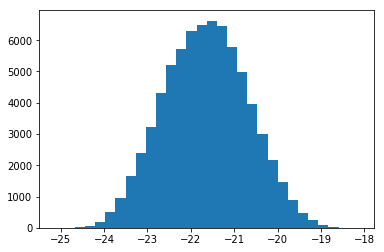

In [11]:
plt.hist(REAL.getCol('M_i_CFHTLS'),bins=30)

In [12]:
U = REAL.getCol("M_Uj")
V = REAL.getCol("M_V")
UV =U-V
Z = REAL.getCol("zspec_1")

TAU = REAL.getCol("TAU_2")
AGE = REAL.getCol("AGE_2")
TEMPL = REAL.getCol("TEMPL")
log_mass = REAL.getCol("log_stellar_mass")
mass_hyp = log_mass


SFR_SED_log = np.array(REAL.getCol("Log_SFR_Gossip"))
SFR_gos = SFR_SED_log
SFR_OII_log = np.array(REAL.getCol("sfrOIIMoust"))

NoiseToSignal = np.array(REAL.getCol("noiseRatio"))

sel_0405, = np.where((Z>0.4)&(Z<=0.5))
sel_0506, = np.where((Z>0.5)&(Z<=0.6))
sel_0607, = np.where((Z>0.6)&(Z<=0.7))
sel_0708, = np.where((Z>0.7)&(Z<=0.8))
sel_0809, = np.where((Z>0.8)&(Z<=0.9))
sel_0910, = np.where((Z>0.9)&(Z<=1.0))
sel_1011, = np.where((Z>1.0)&(Z<=1.1))
sel_1013, = np.where((Z>1.0)&(Z<=1.3))

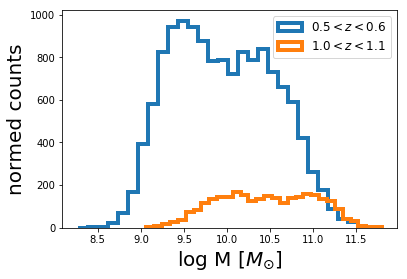

In [168]:
plt.hist(log_mass[sel_0506],bins=30,histtype='step',lw=4,density=False,label=r'$0.5<z<0.6$')
plt.hist(log_mass[sel_1011],bins=30,histtype='step',lw=4,density=False,label=r'$1.0<z<1.1$')
plt.xlabel(r'log M [$M_{\odot}$]')
plt.ylabel('normed counts')
plt.legend(fontsize=12)
plt.show()

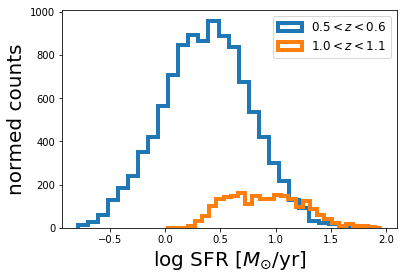

In [169]:
sl = SFR_SED_log[sel_0506]
sh = SFR_SED_log[sel_1011]
plt.hist(sl[sl>-5.],bins=30,histtype='step',lw=4,density=False,label=r'$0.5<z<0.6$')
plt.hist(sh[sh>-5.],bins=30,histtype='step',lw=4,density=False,label=r'$1.0<z<1.1$')
plt.legend(fontsize=12)
plt.xlabel(r'log SFR [$M_{\odot} / \rm{yr}$]')
plt.ylabel('normed counts')
plt.show()

In [13]:
sel_0413 = np.where((Z>0.4)&(Z<=1.3))
sel_0511 = np.where((Z>0.5)&(Z<=1.1))

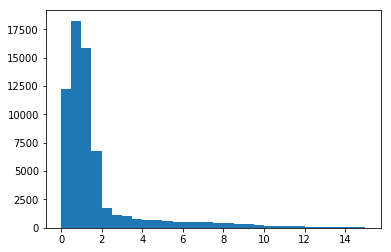

In [14]:
plt.hist(TAU[sel_0511],bins=30,range=(0,15))
plt.show()

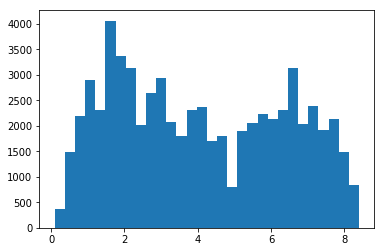

In [27]:
plt.hist(AGE[sel_0511],bins=30)
plt.show()

In [34]:
print(np.median(TAU[sel_0511]))
print(np.std(TAU[sel_0511]))
print('---')
print(np.median(AGE[sel_0511]))
print(np.std(AGE[sel_0511]))

1.0
2.4808676
---
3.8
2.2832408


In [8]:
sel_0413 = np.where((Z>0.4)&(Z<=1.3))
sel_0511 = np.where((Z>0.5)&(Z<=1.1))

In [9]:
print "galaxies in 0.4 < z <= 1.3: ",len(sel_0413[0])
print "galaxies in 0.5 < z <= 1.1: ",len(sel_0511[0])

galaxies in 0.4 < z <= 1.3:  73160
galaxies in 0.5 < z <= 1.1:  64889


In [105]:
## GOSSIP VARIABLES (In my paper I used HYPERZ for magnitudes and stellar masses)
U_gos = REAL.getCol("UJ_abs")
V_gos = REAL.getCol("VJ_abs")
UV_gos = U_gos - V_gos
mass_gos = REAL.getCol("STELLAR_MASS")

## HYPERZ SFR (In my paper I used SFR from GOSSIP)
SFR_hyp = REAL.getCol("log_SFR")

## Comparison with SED fitting GOSSIP variables

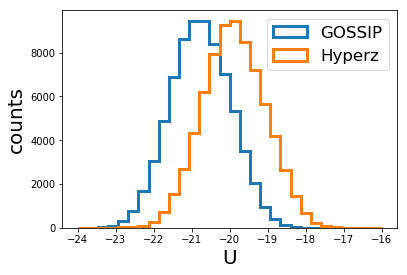

In [106]:
plt.hist(U_gos,bins=30,histtype='step',lw=3,label = 'GOSSIP',range=(-24,-16))
plt.hist(U,bins=30,histtype='step',lw=3,label = 'Hyperz',range=(-24,-16))
plt.xlabel("U")
plt.ylabel("counts")
plt.legend(loc=1,fontsize='small')
plt.savefig("../plots/011/GOSSIP_HYPERZ_U.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

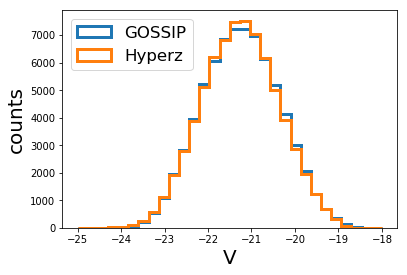

In [107]:
plt.hist(V_gos,bins=30,histtype='step',lw=3,label = 'GOSSIP',range=(-25,-18))
plt.hist(V,bins=30,histtype='step',lw=3,label = 'Hyperz',range=(-25,-18))
plt.xlabel("V")
plt.ylabel("counts")
plt.legend(loc=2,fontsize='small')
plt.savefig("../plots/011/GOSSIP_HYPERZ_V.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

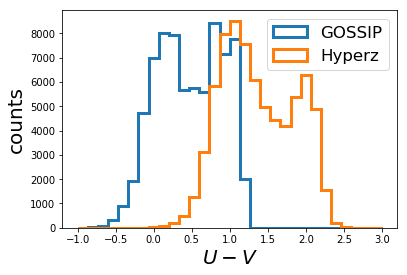

In [108]:
plt.hist(UV_gos,bins=30,histtype='step',lw=3,label = 'GOSSIP',range=(-1,3))
plt.hist(UV,bins=30,histtype='step',lw=3,label = 'Hyperz',range=(-1,3))
plt.xlabel("$U - V$")
plt.ylabel("counts")
plt.legend(loc=1,fontsize='small')
plt.savefig("../plots/011/GOSSIP_HYPERZ_UV.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

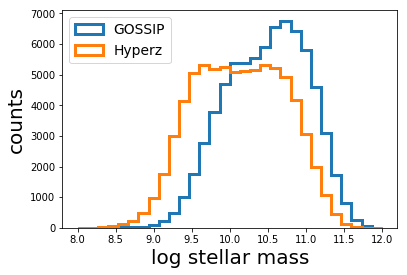

In [109]:
plt.hist(mass_gos,bins=30,histtype='step',lw=3,label = 'GOSSIP',range=(8,12))
plt.hist(log_mass,bins=30,histtype='step',lw=3,label = 'Hyperz',range=(8,12))
plt.xlabel("log stellar mass")
plt.ylabel("counts")
plt.legend(loc=2,fontsize='x-small')
plt.savefig("../plots/011/GOSSIP_HYPERZ_mass.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

In [110]:
print(len(UV_gos))
print(len(UV))

73160
73160


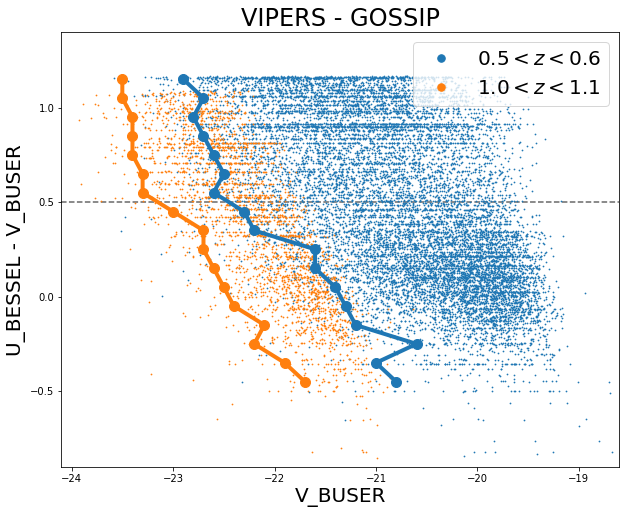

In [114]:
xedge_vip_zlow,yedge_vip_zlow   = EDGE(V_gos[sel_0506],UV_gos[sel_0506],x_min=-25,x_max=-18,y_min=-0.5,y_max=1.2,y_bin_size=0.1)
xedge_vip_zhigh,yedge_vip_zhigh = EDGE(V_gos[sel_1011],UV_gos[sel_1011],x_min=-25,x_max=-18,y_min=-0.5,y_max=1.2,y_bin_size=0.1)

plt.figure(figsize=(10,8))
plt.plot(V_gos[sel_0506],UV_gos[sel_0506],".",markersize=1.5,color='C0',label=r'$0.5<z<0.6$')
plt.plot(V_gos[sel_1011],UV_gos[sel_1011],".",markersize=1.5,color='C1',label=r'$1.0<z<1.1$')
plt.plot(xedge_vip_zlow,yedge_vip_zlow,"-",lw=4,color='C0')
plt.plot(xedge_vip_zhigh,yedge_vip_zhigh,"-",lw=4,color='C1')
plt.plot(xedge_vip_zlow,yedge_vip_zlow,".",lw=4,color='C0',markersize=20)
plt.plot(xedge_vip_zhigh,yedge_vip_zhigh,".",lw=4,color='C1',markersize=20)
plt.legend(markerscale=10,loc=1)
plt.xlabel("V_BUSER")
plt.ylabel("U_BESSEL - V_BUSER")
plt.title('VIPERS - GOSSIP')
plt.ylim(-0.9,-0.9+2.3)
plt.xlim(-24.1,-24.1+5.5)
plt.axhline(0.5,ls='dashed',c='k',zorder=-1,alpha=0.6)
plt.savefig("../plots/011/GOSSIP_colour_magnitude_05061011.png",bbox_inches="tight",pad_inches=0.1)
plt.show()

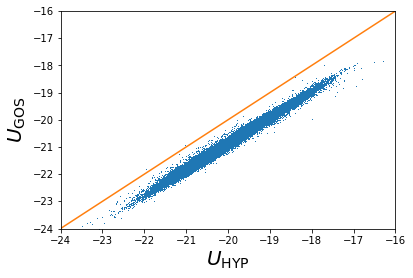

In [16]:
plt.plot(U,U_gos,",")
plt.plot([-26.,-13.],[-26.,-13.])
plt.xlim(-24.,-16.)
plt.ylim(-24.,-16.)
plt.xlabel(r"$U_{\rm{HYP}}$")
plt.ylabel(r"$U_{\rm{GOS}}$")
plt.savefig("../plots/011/GOSSIP_HYPERZ_U_plot.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

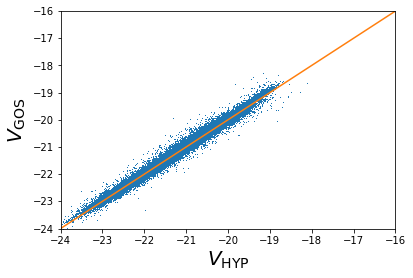

In [17]:
plt.plot(V,V_gos,",")
plt.plot([-26.,-13.],[-26.,-13.])
plt.xlim(-24.,-16.)
plt.ylim(-24.,-16.)
plt.xlabel(r"$V_{\rm{HYP}}$")
plt.ylabel(r"$V_{\rm{GOS}}$")
plt.savefig("../plots/011/GOSSIP_HYPERZ_V_plot.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

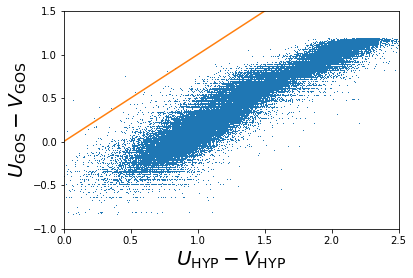

In [18]:
plt.plot(UV,UV_gos,",")
plt.plot([-1.,2.5],[-1.,2.5])
plt.xlim(0.,2.5)
plt.ylim(-1.,1.5)
plt.xlabel(r"$U_{\rm{HYP}}-V_{\rm{HYP}}$")
plt.ylabel(r"$U_{\rm{GOS}}-V_{\rm{GOS}}$")
plt.savefig("../plots/011/GOSSIP_HYPERZ_UV_plot.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

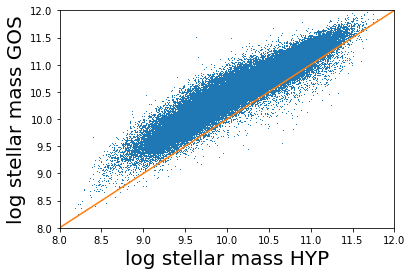

In [42]:
plt.plot(mass_hyp,mass_gos,",")
plt.plot([8.,13.],[8.,13.])
plt.xlim(8.,12.)
plt.ylim(8.,12.)
plt.xlabel(r"log stellar mass HYP")
plt.ylabel(r"log stellar mass GOS")
plt.savefig("../plots/011/GOSSIP_HYPERZ_mass_plot.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

# SFR

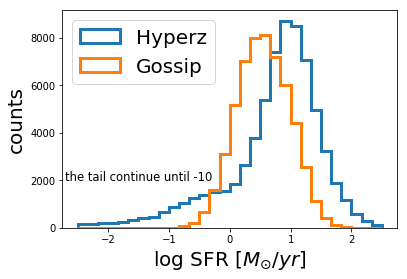

In [24]:
fig, ax = plt.subplots()
ax.hist(SFR_hyp,range=(-2.5,2.5),bins=30,label='Hyperz',histtype='step',lw=3)
ax.hist(SFR_gos,range=(-2.5,2.5),bins=30,label='Gossip',histtype='step',lw=3)
ax.set_ylabel(r"counts")
ax.set_xlabel(r"log SFR $[M_{\odot}/yr]$")
ax.text(-2.7,2000,"the tail continue until -10",fontsize='xx-small')
ax.legend(loc=2)
plt.savefig("../plots/011/GOSSIP_HYPERZ_SFR.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

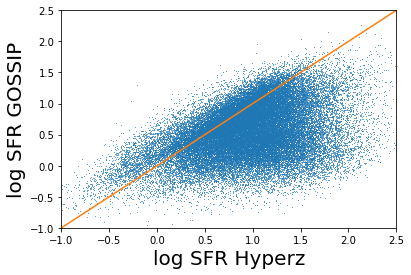

In [35]:
fig, ax = plt.subplots()
ax.plot(SFR_hyp,SFR_gos,",",alpha=0.7)
ax.plot([-1,3],[-1,3])
ax.set_xlabel("log SFR Hyperz")
ax.set_ylabel("log SFR GOSSIP")

plt.xlim(-1,2.5)
plt.ylim(-1,2.5)
plt.savefig("../plots/011/GOSSIP_HYPERZ_SFR_plot.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

## SFR stellar mass plane

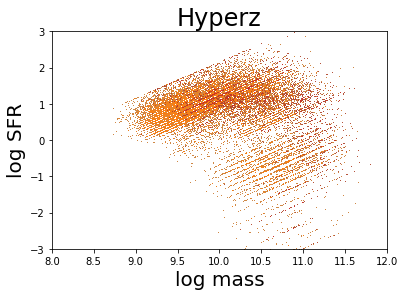

In [102]:
fig, ax = plt.subplots()
ax.plot(mass_hyp[sel_0607],SFR_hyp[sel_0607],",",alpha=0.7)
ax.plot(mass_hyp[sel_0607],SFR_hyp[sel_0607],",",alpha=0.7,markersize=1)

ax.plot(mass_hyp[sel_1011],SFR_hyp[sel_1011],",",alpha=0.7)
ax.plot(mass_hyp[sel_1011],SFR_hyp[sel_1011],",",alpha=0.7,markersize=1)

#ax.plot([-1,3],[-1,3])
ax.set_xlabel("log mass")
ax.set_ylabel("log SFR")
ax.set_title('Hyperz')

#ax.set_colorbar()
plt.xlim(8,12)
plt.ylim(-3,3)
#plt.savefig("../plots/011/HYPERZ_mass_SFR.png.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

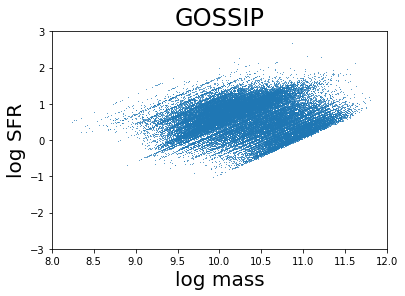

In [55]:
fig, ax = plt.subplots()
ax.plot(mass_gos,SFR_gos,",",alpha=0.7)
#ax.plot([-1,3],[-1,3])
ax.set_xlabel("log mass")
ax.set_ylabel("log SFR")
ax.set_title('GOSSIP')

plt.xlim(8,12)
plt.ylim(-3,3)
plt.savefig("../plots/011/GOSSIP_mass_SFR.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

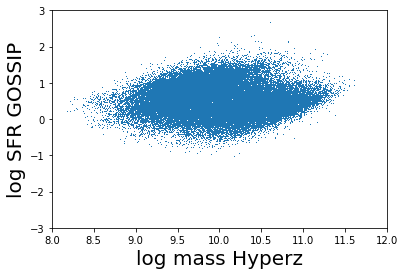

In [62]:
fig, ax = plt.subplots()
ax.plot(mass_hyp,SFR_gos,",",alpha=1)
#ax.plot([-1,3],[-1,3])
ax.set_xlabel("log mass Hyperz")
ax.set_ylabel("log SFR GOSSIP")


plt.xlim(8,12)
plt.ylim(-3,3)
#plt.xlim(8.5,11.5)
#plt.ylim(-1,2)
plt.savefig("../plots/011/GOSSIP_HYPERZ_SFR_mass.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

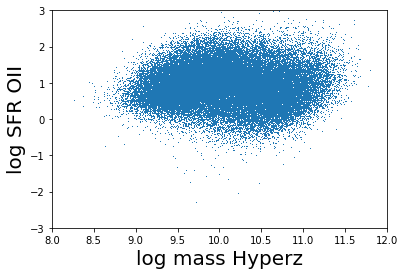

In [65]:
fig, ax = plt.subplots()
ax.plot(mass_hyp,SFR_OII_log,",",alpha=1)
#ax.plot([-1,3],[-1,3])
ax.set_xlabel("log mass Hyperz")
ax.set_ylabel("log SFR OII")


plt.xlim(8,12)
plt.ylim(-3,3)
#plt.xlim(8.5,11.5)
#plt.ylim(-1,2)
plt.savefig("../plots/011/HYPERZ_SFROII_mass.png",bbox_inches="tight",pad_inches=0.0)
plt.show()

# z-COSMOS variables

In [72]:
zCOSMOS = Table("../../absmags_zcosmos_bright4.2.dat")

In [73]:
cZ = zCOSMOS.getCol("2.ZSPEC")
cU = zCOSMOS.getCol("5.MU_JKC")
cV = zCOSMOS.getCol("7.MV_JKC")
cUV = cU-cV

In [74]:
c_sel_0405 = np.where((cZ>0.4)&(cZ<=0.5))
c_sel_0506 = np.where((cZ>0.5)&(cZ<=0.6))
c_sel_0607 = np.where((cZ>0.6)&(cZ<=0.7))
c_sel_0708 = np.where((cZ>0.7)&(cZ<=0.8))
c_sel_0809 = np.where((cZ>0.8)&(cZ<=0.9))
c_sel_0910 = np.where((cZ>0.9)&(cZ<=1.0))
c_sel_1011 = np.where((cZ>1.0)&(cZ<=1.1))
c_sel_1013 = np.where((cZ>1.0)&(cZ<=1.3))

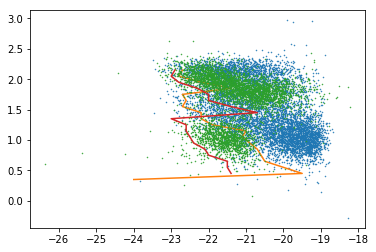

In [75]:
plt.plot(V[sel_0405],U[sel_0405]-V[sel_0405],'.',markersize=1)
plt.plot(EDGE(V[sel_0405],U[sel_0405]-V[sel_0405],y_min=0.3,y_max=2.2)[0],
         EDGE(V[sel_0405],U[sel_0405]-V[sel_0405],y_min=0.3,y_max=2.2)[1])
plt.plot(NOQUENCH_45['v'],NOQUENCH_45['uv'],'.',markersize=1)
plt.plot(EDGE(np.array(NOQUENCH_45['v']),np.array(NOQUENCH_45['uv']),y_min=0.4,y_max=2.2)[0],
         EDGE(np.array(NOQUENCH_45['v']),np.array(NOQUENCH_45['uv']),y_min=0.4,y_max=2.2)[1])
plt.show()

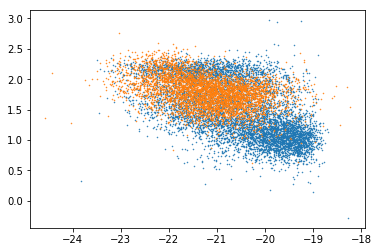

In [76]:
plt.plot(V[sel_0405],U[sel_0405]-V[sel_0405],'.',markersize=1)
plt.plot(QUENCH3_45['v'],QUENCH3_45['uv'],'.',markersize=1)
plt.show()

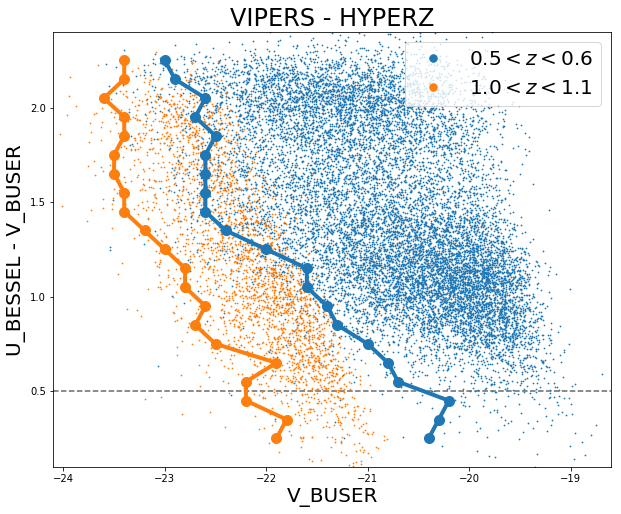

In [77]:
xedge_vip_zlow,yedge_vip_zlow   = EDGE(V[sel_0506],UV[sel_0506],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4,y_bin_size=0.1)
xedge_vip_zhigh,yedge_vip_zhigh = EDGE(V[sel_1011],UV[sel_1011],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4,y_bin_size=0.1)

plt.figure(figsize=(10,8))
plt.plot(V[sel_0506],UV[sel_0506],".",markersize=1.5,color='C0',label=r'$0.5<z<0.6$')
plt.plot(V[sel_1011],UV[sel_1011],".",markersize=1.5,color='C1',label=r'$1.0<z<1.1$')
plt.plot(xedge_vip_zlow,yedge_vip_zlow,"-",lw=4,color='C0')
plt.plot(xedge_vip_zhigh,yedge_vip_zhigh,"-",lw=4,color='C1')
plt.plot(xedge_vip_zlow,yedge_vip_zlow,".",lw=4,color='C0',markersize=20)
plt.plot(xedge_vip_zhigh,yedge_vip_zhigh,".",lw=4,color='C1',markersize=20)
plt.legend(markerscale=10,loc=1)
plt.xlabel("V_BUSER")
plt.ylabel("U_BESSEL - V_BUSER")
plt.title('VIPERS - HYPERZ')
plt.ylim(0.1,0.1+2.3)
plt.xlim(-24.1,-24.1+5.5)
plt.axhline(0.5,ls='dashed',c='k',zorder=-1,alpha=0.6)
#plt.savefig("../plots/011/HYPERZ_colour_magnitude_05061011.png",bbox_inches="tight",pad_inches=0.1)
#plt.savefig('../plots/011/bright_edge_VIPERS.png')
plt.show()

In [78]:
def histo_in_colour_bin_general_1(min_col,max_col,u,v,i,redshift,thr=0.15,xbsz=0.1,save=True,path='./plots/image.png'):
    plt.figure(figsize=(10,8))
    
    #sec = np.where(i<ABSOLUTE_MAGNITUDE_minus5logh(22.5,z=redshift))
    
    #sec = np.where((2>1))
    
    u= np.array(u)
    v=np.array(v)
    i=np.array(i)
    
    select_colour_bin = np.where(((u-v)<max_col)&((u-v)>min_col))
    
    plt.hist(v[select_colour_bin],bins=int((25-19)/xbsz),range=(-26,-18),label=str(min_col)+'<U-V<'+str(max_col))
    #print(int((22-10)/0.1))
    
    counts,b = np.histogram(v[select_colour_bin],bins=int((26-18)/xbsz),range=(-26,-18))
    
    #plt.axvline(b[np.where(counts==np.max(counts))],c='k',lw=3)
    plt.axvline(b[np.argmax(counts)],c='k',lw=3)
    
    
    #loop to find the edge
    for j in range(np.argmax(counts),0,-1):
        if (counts[j]<np.max(counts) * thr):
            edge_index = j
            break
    plt.axvline(b[j],c='k',lw=3)
    plt.xlabel("mag_V_ext")
    plt.ylabel('counts')
    plt.legend()
    if save:
        plt.savefig(path)

    plt.show()


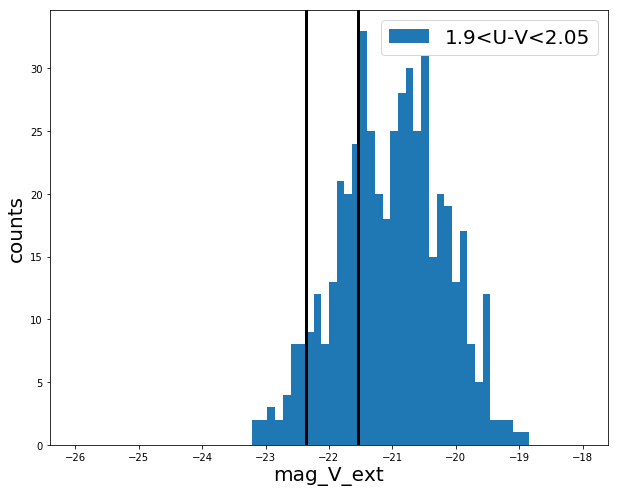

In [79]:
histo_in_colour_bin_general_1(min_col=1.90,
                            max_col=2.05,
                            v=np.array(V[sel_0405]),
                            u=np.array(U[sel_0405]),
                            i=np.array(V[sel_0405]),
                            redshift=0.456,
                            xbsz=0.09,
                            thr=0.15,
                            path='../plots/011/VIPERS_histo_190_205.png')

In [15]:
#del sys.modules['edge']

In [16]:
#from edge import *

In [17]:
max_col = 1.05
min_col = 1.00
select_colour_bin = np.where(((UV[sel_0405])<max_col)&(UV[sel_0405]>min_col))

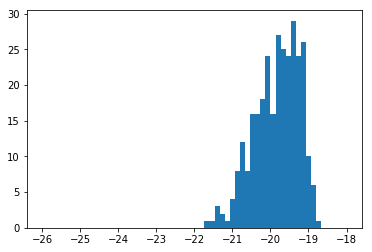

In [18]:
plt.hist(V[sel_0405][select_colour_bin],bins=int((25-19)/0.1),range=(-26,-18),label=str(min_col)+'<U-V<'+str(max_col))
plt.show()

# Figure 1 paper

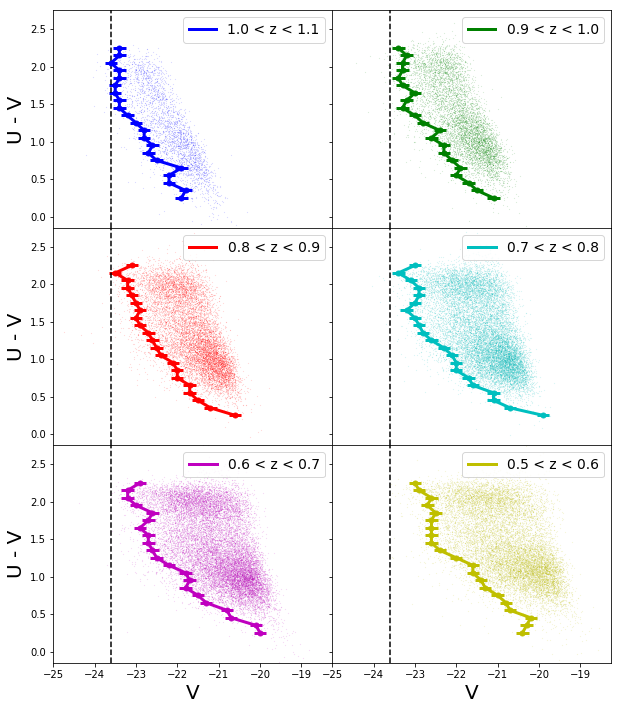

In [118]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    plt.axvline(x=-23.6,linestyle='dashed',color="k")

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)

    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V")


    plt.errorbar(x_term,y_term,xerr=0.15,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.savefig("../plots/011/COLMAG_6BINS_1011.PNG")

(array([   18.,  1538.,  5293.,  6607.,  6337.,  8117., 14005.,  6885.,
         1350.,   103.]),
 array([-11.29345644, -10.9222973 , -10.55113816, -10.17997902,
         -9.80881988,  -9.43766074,  -9.0665016 ,  -8.69534246,
         -8.32418332,  -7.95302418,  -7.58186504]),
 <a list of 10 Patch objects>)

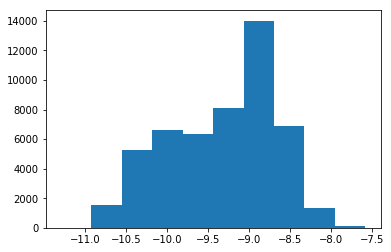

In [161]:
plt.hist(SFR_SED_log[SFR_SED_log>0]-log_mass[SFR_SED_log>0] )

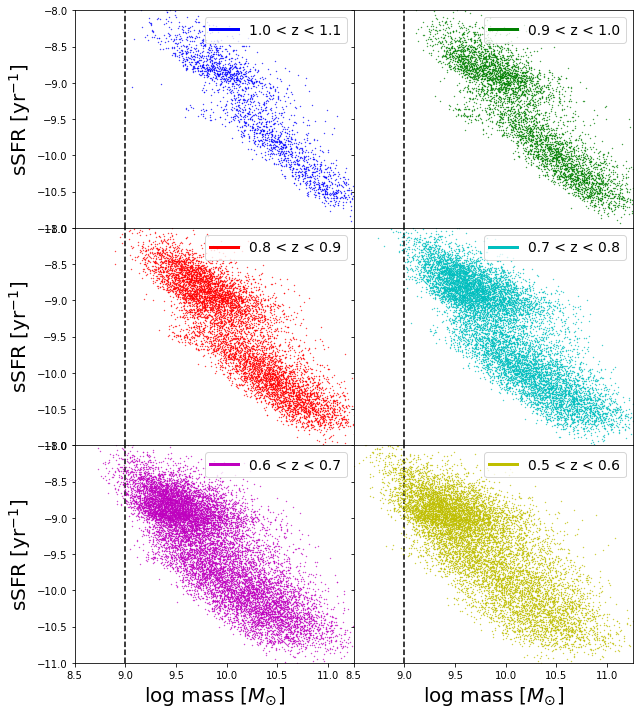

In [167]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = log_mass[zsel]                  # log mass
    UV_z = SFR_SED_log[zsel]-V_z         # specific SFR
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=9,x_max=11,y_min=0.05,y_max=0.1)

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    plt.axvline(x=9.,linestyle='dashed',color="k")

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.7)#label=str(zlow)+" < z < "+str(zhigh)

    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("sSFR [yr$^{-1}$]")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel(r"log mass [$M_{\odot}$]")


    plt.errorbar(x_term,y_term,xerr=0.15,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    #ax2.axis([8.5,11.255,-0.05,0.22])
    ax2.axis([8.5,11.255,-11,-8])
    ax2.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.savefig("../plots/011/COLMAG_6BINS_1011.PNG")

In [163]:
#colour coded by mass

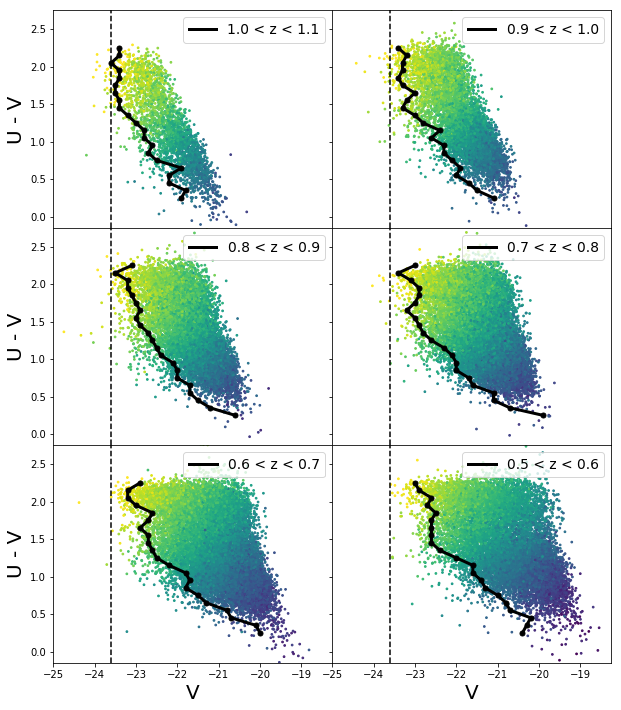

In [51]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    log_mass_z = log_mass[zsel]

    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    plt.axvline(x=-23.6,linestyle='dashed',color="k")

    plt.scatter(V_z,UV_z,c=log_mass_z,s=3,vmin=8.5,vmax=11.5)#label=str(zlow)+" < z < "+str(zhigh)

    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V")


    plt.plot(x_term,y_term,lw=3,label=str(zlow)+" < z < "+str(zhigh),c='k')
    plt.plot(x_term,y_term,".",markersize=10,c='k')
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.colorbar()
plt.savefig("../plots/011/COLMAG_6BINS_1011_mass.PNG")
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

In [17]:
len(V_z)

13513

In [867]:
5*np.log10(0.7)

-0.7745097999287159

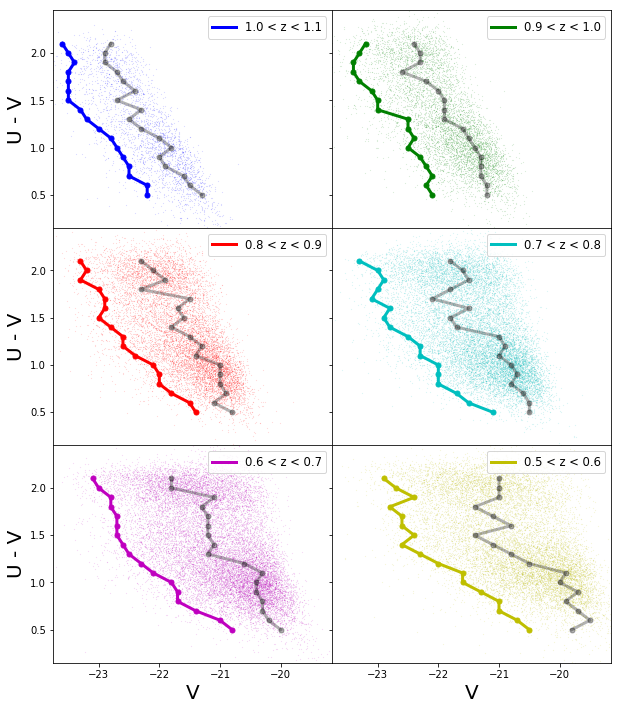

In [218]:
# Let's plot the most popuated bin as well

REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)
    
    x_term_maxpop,y_term_maxpop = EDGE_most_populated(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    #plt.axvline(x=-23.6,linestyle='dashed',color="k")

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)

    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V")


    plt.plot(x_term,y_term,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])
    
    #plt.plot(x_term_maxpop,y_term_maxpop,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k],alpha=0.3)
    #plt.plot(x_term_maxpop,y_term_maxpop,".",markersize=10,c=stylecolor[k],alpha=0.3)
    plt.plot(x_term_maxpop,y_term_maxpop,lw=3,c='k',alpha=0.3)
    plt.plot(x_term_maxpop,y_term_maxpop,".",markersize=10,c='k',alpha=0.3)
    
    
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    #ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.axis([-23.75,-19.15,+0.15,2.45])
    ax2.legend(markerscale=2,numpoints=1,fontsize="xx-small",loc=1)


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.savefig("../plots/011/COLMAG_6BINS_1011_most_populated.PNG")
plt.show()

In [223]:
Fig_1 = plt.imread("../plots/011/COLMAG_6BINS_1011_most_populated.PNG")
Fig_1.shape

(864, 720, 4)

In [225]:
Fig_1_cropped = Fig_1[10:860,0:720]
Fig_1_cropped.shape

(850, 720, 4)

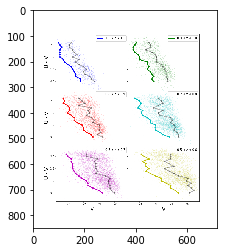

In [231]:
plt.imshow(Fig_1_cropped)#.savefig("../plots/011/fig1_crop.png")
plt.figure(figsize=(14,10))
plt.savefig("../plots/011/fig1_crop.png")
plt.show()
# it is too small, better to crop it in a more stupid way

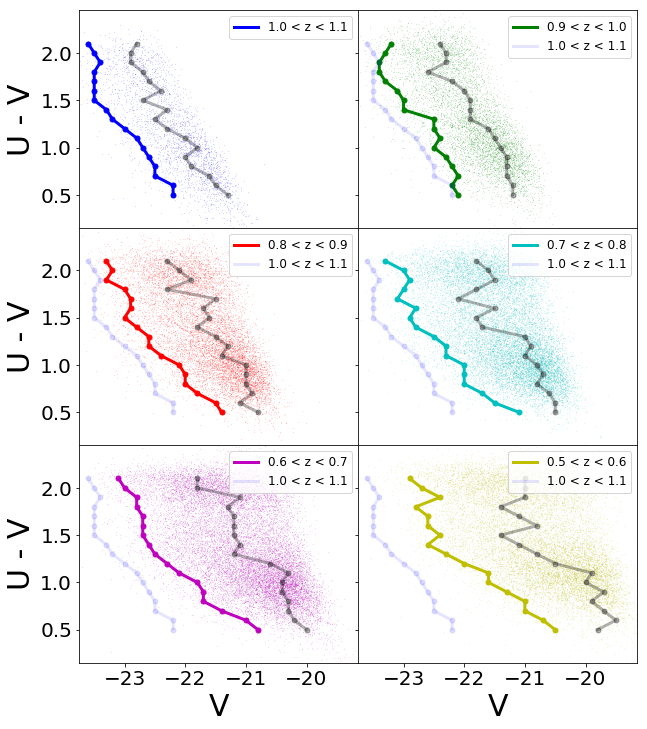

In [40]:
# Let's plot the most popuated bin as well

REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)
    
    #print high redshift edge in other panels
    if zhigh==REDSHIFT_BINS[-1]:
        edge_high = [x_term,y_term]
        plot_high = False
    else:
        plot_high = True
    
    
    x_term_maxpop,y_term_maxpop = EDGE_most_populated(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    #plt.axvline(x=-23.6,linestyle='dashed',color="k")

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)

    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V",fontsize=30)
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V",fontsize=30)


    plt.plot(x_term,y_term,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])
    
    if plot_high:
        plt.plot(edge_high[0],edge_high[1],lw=3,label=str(REDSHIFT_BINS[-2])+" < z < "+str(REDSHIFT_BINS[-1]),c=stylecolor[0],alpha=0.1)
        plt.plot(edge_high[0],edge_high[1],".",markersize=10,c=stylecolor[0],alpha=0.1)
        
    
    #plt.plot(x_term_maxpop,y_term_maxpop,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k],alpha=0.3)
    #plt.plot(x_term_maxpop,y_term_maxpop,".",markersize=10,c=stylecolor[k],alpha=0.3)
    plt.plot(x_term_maxpop,y_term_maxpop,lw=3,c='k',alpha=0.3)
    plt.plot(x_term_maxpop,y_term_maxpop,".",markersize=10,c='k',alpha=0.3)
    
    
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    #ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.axis([-23.75,-19.15,+0.15,2.45])
    ax2.legend(markerscale=2,numpoints=1,fontsize=12,loc=1)


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
 
    
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig("../plots/011/COLMAG_6BINS_1011_most_populated.PNG",bbox_inches="tight",pad_inches=0.0)
plt.savefig("../plots/paper/COLMAG_6BINS_1011_most_populated_fig5.PNG",bbox_inches="tight",pad_inches=0.0)

plt.show()

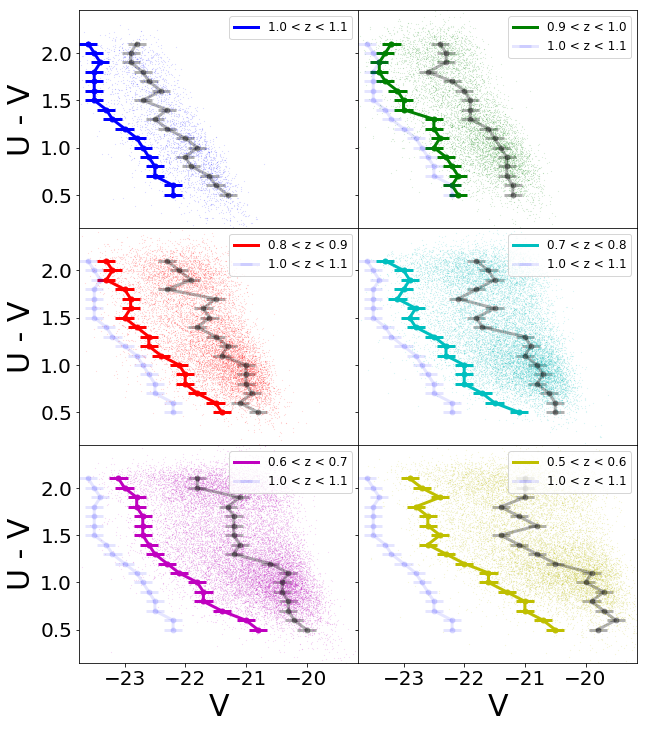

In [122]:
# Let's try the errorbar

REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)
    
    #print high redshift edge in other panels
    if zhigh==REDSHIFT_BINS[-1]:
        edge_high = [x_term,y_term]
        plot_high = False
    else:
        plot_high = True
    
    
    x_term_maxpop,y_term_maxpop = EDGE_most_populated(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    #plt.axvline(x=-23.6,linestyle='dashed',color="k")

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)

    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V",fontsize=30)
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V",fontsize=30)


    plt.errorbar(x_term,y_term,xerr=0.15,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])
    
    if plot_high:
        plt.errorbar(edge_high[0],edge_high[1],xerr=0.15,lw=3,label=str(REDSHIFT_BINS[-2])+" < z < "+str(REDSHIFT_BINS[-1]),c=stylecolor[0],alpha=0.1)
        plt.plot(edge_high[0],edge_high[1],".",markersize=10,c=stylecolor[0],alpha=0.1)
        
    
    #plt.plot(x_term_maxpop,y_term_maxpop,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k],alpha=0.3)
    #plt.plot(x_term_maxpop,y_term_maxpop,".",markersize=10,c=stylecolor[k],alpha=0.3)
    plt.errorbar(x_term_maxpop,y_term_maxpop,xerr=0.15,lw=3,c='k',alpha=0.3)
    plt.plot(x_term_maxpop,y_term_maxpop,".",markersize=10,c='k',alpha=0.3)
    
    
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    #ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.axis([-23.75,-19.15,+0.15,2.45])
    ax2.legend(markerscale=2,numpoints=1,fontsize=12,loc=1)


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
 
    
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig("../plots/011/COLMAG_6BINS_1011_most_populated.PNG",bbox_inches="tight",pad_inches=0.0)
plt.savefig("../plots/paper/COLMAG_6BINS_1011_most_populated_fig5.PNG",bbox_inches="tight",pad_inches=0.0)

plt.show()

# Figure 3

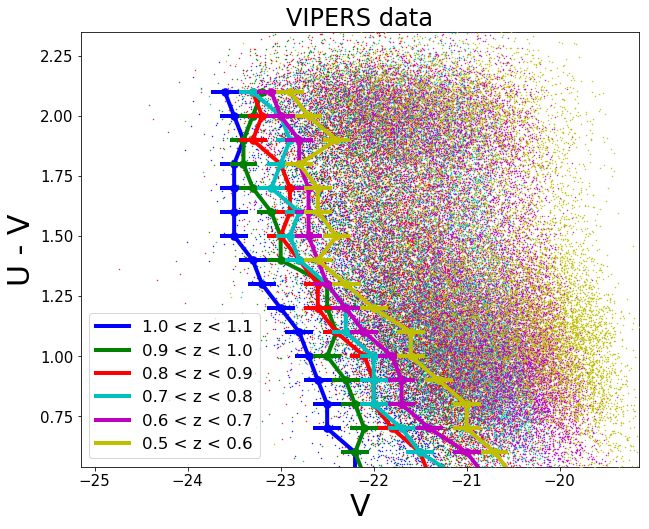

In [126]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

#REDSHIFT_BINS=[0.5,0.8,1.1]
#REDSHIFT_BINS=[0.5,0.7,0.9,1.1]

fig =plt.figure(figsize=(10,8))

k=0
a=1

for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,x_bin_size=0.1,y_bin_size=0.1)
    #x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.7,y_max=2.05,x_bin_size=0.1,y_bin_size=0.1)

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.9,zorder=a)#label=str(zlow)+" < z < "+str(zhigh)
    
    plt.ylabel("U - V",fontsize=30)
    plt.xlabel("V",fontsize=30)

    plt.errorbar(x_term,y_term,xerr=0.15,lw=4,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k],zorder=a+100)
    plt.plot(x_term,y_term,".",markersize=15,c=stylecolor[k],zorder=a+100)
    #plt.axis([-25.7745,-18.2745,0.25,2.6])
    #plt.axis([-23.75,-19.15,0.15,2.45])
    plt.axis([-25.15,-19.15,0.54,2.35])
    plt.legend(markerscale=2,numpoints=1,fontsize="small",loc=3)


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('VIPERS data')    
plt.savefig("../plots/011/COLMAG_6BINS_ALL_1011_samerange.PNG",bbox_inches="tight",pad_inches=0.0)
plt.savefig("../plots/paper/COLMAG_6BINS_ALL_1011_samerange_fig9.PNG",bbox_inches="tight",pad_inches=0.0)

plt.show()

In [882]:
ABSOLUTE_MAGNITUDE_minus5logh(22.5,0.45)+5*np.log10(0.7)

-19.489046529254097

In [14]:
print len(UV[UV>2.])
print len(UV[UV<0.75])

9871
5815


# Fig. 2 (Comparison z-COSMOS)

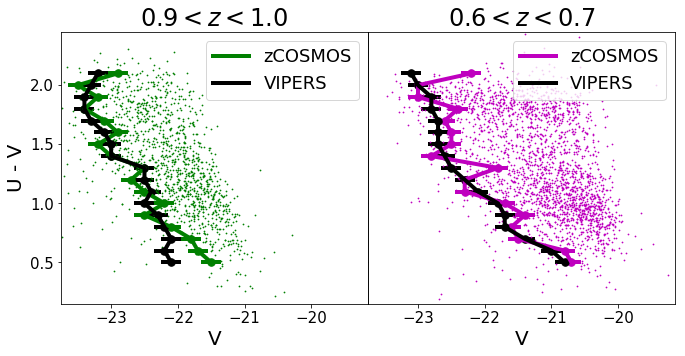

In [128]:
#plt.figure(figsize=(14,8))
plt.figure(figsize=(11,5))
#ax2 is the first panel ;)
ax1 = plt.subplot(122)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2 = plt.subplot(121)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


ax1.axis([-23.75,-19.15,0.15,2.45])
ax2.axis([-23.75,-19.15,0.15,2.45])

#ax1.axis([-25.,-19.22,-0.25,2.85])
#ax2.axis([-25.,-19.22,-0.25,2.85])

plt.setp(ax2.get_yticklabels(),visible=True)
plt.setp(ax1.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax1.plot(cV[c_sel_0607],cUV[c_sel_0607],".m",markersize=1.5)
ax2.plot(cV[c_sel_0910],cUV[c_sel_0910],".g",markersize=1.5)


cx1,cy1 = EDGE(cV[c_sel_0607],cUV[c_sel_0607],x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)
ax1.errorbar(cx1,cy1,xerr=0.15,color="m",lw=4,label=r"zCOSMOS")
ax1.plot(cx1,cy1,".m",markersize=15)

vx1,vy1 = EDGE(V[sel_0607],UV[sel_0607],x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)
ax1.errorbar(vx1,vy1,xerr=0.15,color="k",lw=4,label=r"VIPERS")
ax1.plot(vx1,vy1,".k",markersize=15)


cx2,cy2 = EDGE(cV[c_sel_0910],cUV[c_sel_0910],x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)
ax2.errorbar(cx2,cy2,xerr=0.15,color="g",lw=4,label=r"zCOSMOS")
ax2.plot(cx2,cy2,".g",markersize=15)

vx2,vy2 = EDGE(V[sel_0910],UV[sel_0910],x_min=-25,x_max=-18,y_min=0.45,y_max=2.2,y_bin_size=0.1)
ax2.errorbar(vx2,vy2,xerr=0.15,color="k",lw=4,label=r"VIPERS")
ax2.plot(vx2,vy2,".k",markersize=15)


ax2.set_ylabel("U - V")
ax1.set_xlabel("V")
ax2.set_xlabel("V")

ax1.legend(loc=1,fontsize=18)
ax2.legend(loc=1,fontsize=18)

ax1.set_title(r"$0.6<z<0.7$")
ax2.set_title(r"$0.9<z<1.0$")

#plt.savefig("../plots/011/COLMAG_zCOSMOS_VIPERS.PNG",bbox_inches="tight",pad_inches=0.0)
plt.savefig("../plots/paper/COLMAG_zCOSMOS_VIPERS_figC13.PNG",bbox_inches="tight",pad_inches=0.0)
plt.show()

# Fig 5 (SFR HISTO)

In [8]:
good_SIGNAL = np.where((NoiseToSignal<0.33)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))

log_RATIO_SED_OII = SFR_SED_log[good_SIGNAL] -SFR_OII_log[good_SIGNAL] #- np.log10(0.33)
log_RATIO_SED_OII_corrected = SFR_SED_log[good_SIGNAL] -SFR_OII_log[good_SIGNAL] - np.log10(0.33)

print('NOT CORRECTED')
print("log median: "+str(np.median(log_RATIO_SED_OII)))
print("log mean: "+str(np.mean(log_RATIO_SED_OII)))
print("log std: "+str(np.std(log_RATIO_SED_OII)))

print("\n --- \n")

print('CORRECTED')
print("log median: "+str(np.median(log_RATIO_SED_OII_corrected)))
print("log mean: "+str(np.mean(log_RATIO_SED_OII_corrected)))
print("log std: "+str(np.std(log_RATIO_SED_OII_corrected)))

NOT CORRECTED
log median: -0.42780392191060956
log mean: -0.442929169628149
log std: 0.33963077652770973

 --- 

CORRECTED
log median: 0.05368213821150292
log mean: 0.03855689049396351
log std: 0.33963077652770973


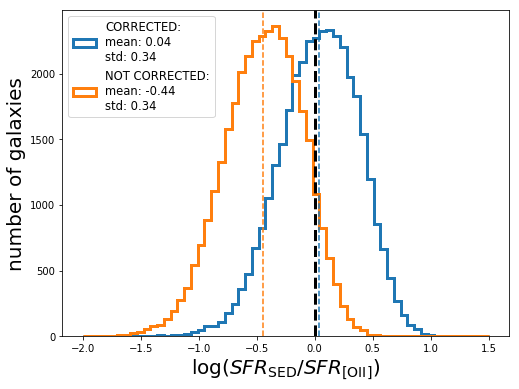

In [9]:
plt.figure(figsize=(8,6))

plt.hist(log_RATIO_SED_OII_corrected,bins=60,range=(-2,1.5),histtype='step',lw=3,color="C0",
         label="CORRECTED:\nmean: "+str(round(np.mean(log_RATIO_SED_OII_corrected),2))+"\nstd: "+str(round(np.std(log_RATIO_SED_OII_corrected),2))+" ")

plt.axvline(np.mean(log_RATIO_SED_OII_corrected),color='C0',ls='dashed')
#plt.axvline(np.median(log_RATIO_SED_OII_corrected),color='C0',ls='dashed')


plt.hist(log_RATIO_SED_OII,bins=60,range=(-2,1.5),histtype='step',lw=3,color="C1",
         label="NOT CORRECTED:\nmean: "+str(round(np.mean(log_RATIO_SED_OII),2))+"\nstd: "+str(round(np.std(log_RATIO_SED_OII),2))+" ")

plt.axvline(np.mean(log_RATIO_SED_OII),color='C1',ls='dashed')
#plt.axvline(np.median(log_RATIO_SED_OII),color='C1',ls='dashed')

plt.axvline(0.,c='k',ls='--',lw=3)


plt.xlabel(r"$\log \left( SFR_{\rm{SED}} / SFR_{\rm{[OII]}} \right)$")
plt.ylabel("number of galaxies")
plt.legend(fontsize="xx-small",loc=2)

#plt.savefig("../plots/011/SFR_HISTO.PNG")

plt.show()

In [10]:
10**(-0.44)

0.36307805477010135

In [11]:
10**(0.33)

2.137962089502232

# Fig 6 (SFR in colour bins)

In [56]:
def MAD(vector):
    return np.median(np.fabs(vector - np.median(vector)))


def sfr_in_colour(sfr,clr,clr_min=0.55,clr_max=2.1,clr_bin_size=0.15,median=True,log=True):
    '''Copied from the algorithm for the edge so that I can apply the same binning'''
    clr_Nbins = int((clr_max - clr_min) / clr_bin_size)

    m_sfr=[]
    m_clr=[]
    s_sfr=[]
    s_clr=[]

    for i in range(clr_Nbins):
        clr_low = clr_min + clr_bin_size * i
        clr_high = clr_min + clr_bin_size * (i+1)
        clr_center = (clr_low+clr_high)/2.
        
        select_clr_bin = np.where((clr>=clr_low)&(clr<clr_high))
        
        if median:
            if log:
                m_sfr.append(np.median(sfr[select_clr_bin]))
                s_sfr.append(MAD(sfr[select_clr_bin]))
            else:
                m_sfr.append(np.median(10**sfr[select_clr_bin]))
                s_sfr.append(MAD(10**sfr[select_clr_bin]))
        else:
            if log:
                m_sfr.append(np.mean(sfr[select_clr_bin]))
                s_sfr.append(np.std(sfr[select_clr_bin]))
            else:
                m_sfr.append(np.mean(10**sfr[select_clr_bin]))
                s_sfr.append(np.std(10**sfr[select_clr_bin]))
        m_clr.append(clr_center)
        s_clr.append(MAD(clr[select_clr_bin]))

    return np.array(m_sfr), np.array(m_clr), np.array(s_sfr), np.array(s_clr)


In [57]:
def sfr_ratio_in_colour(sfr1,sfr2,clr,clr_min=0.55,clr_max=2.1,clr_bin_size=0.15,median=True,log=True):
    '''Copied from the algorithm for the edge so that I can apply the same binning'''
    clr_Nbins = int((clr_max - clr_min) / clr_bin_size)

    m_clr=[]   
    s_clr=[]
    m_ratio=[]
    s_ratio= []
    
    for i in range(clr_Nbins):
        clr_low = clr_min + clr_bin_size * i
        clr_high = clr_min + clr_bin_size * (i+1)
        clr_center = (clr_low+clr_high)/2.
        
        select_clr_bin = np.where((clr>=clr_low)&(clr<clr_high))
        
        
        log_ratio = np.array(sfr1[select_clr_bin] - sfr2[select_clr_bin])
        
        
        if median:
            if log:
                m_ratio.append(np.median(log_ratio))
                s_ratio.append(MAD(log_ratio))
            else:
                m_ratio.append(np.median(10**log_ratio))
                s_ratio.append(MAD(10**log_ratio))
        else:
            if log:
                m_ratio.append(np.mean(log_ratio))
                s_ratio.append(np.std(log_ratio))
            else:
                m_sfr.append(np.mean(10**log_ratio))
                s_sfr.append(np.std(10**log_ratio))
                
        m_clr.append(clr_center)
        s_clr.append(MAD(clr[select_clr_bin]))

    return np.array(m_ratio), np.array(m_clr), np.array(s_ratio), np.array(s_clr)


In [58]:
m_ratio,m_clr,s_ratio,s_clr = sfr_ratio_in_colour(SFR_SED_log[good_SIGNAL],SFR_OII_log[good_SIGNAL],UV[good_SIGNAL],log=False)

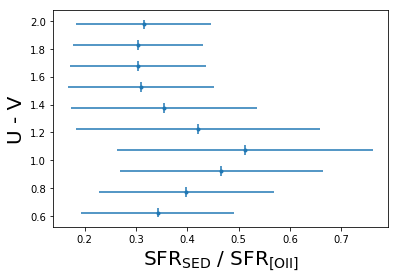

In [59]:
plt.errorbar(m_ratio,m_clr,xerr=s_ratio,yerr=s_clr,fmt=".")
plt.xlabel(r'SFR$_{\rm{SED}}$ / SFR$_{\rm{[OII]}}$')
plt.ylabel('U - V')

plt.show()

In [29]:
good_0607 = np.intersect1d(good_SIGNAL,sel_0607)
print good_0607

[    3     5     7 ... 73076 73154 73159]


In [38]:
x,y ,ex,ey= sfr_in_colour(SFR_SED_log[good_0607],UV[good_0607],median=True,log=False)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[good_0607],UV[good_0607],median=True,log=False)

In [39]:
x_,y_ ,ex_,ey_= sfr_in_colour(SFR_SED_log[sel_0607],UV[sel_0607],median=True,log=False)
x1_,y1_,ex1_,ey1_ = sfr_in_colour(SFR_OII_log[sel_0607],UV[sel_0607],median=True,log=False)

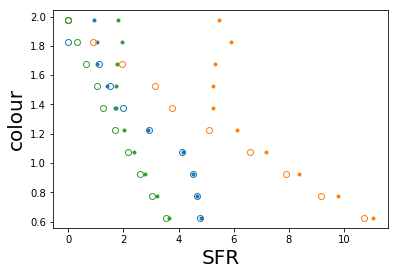

In [50]:
plt.plot(x,y,".")
plt.plot(x1,y1,".")
plt.plot(x1*0.33,y1,".")
plt.plot(x_,y_,"C0o",fillstyle='none')
plt.plot(x1_,y1_,"C1o",fillstyle='none')
plt.plot(x1_*0.33,y1,"C2o",fillstyle='none')
#plt.xlim(0,20)
plt.xlabel('SFR')
plt.ylabel('colour')
plt.show()

In [30]:
sel_0607

array([    3,     5,     7, ..., 73152, 73154, 73159])

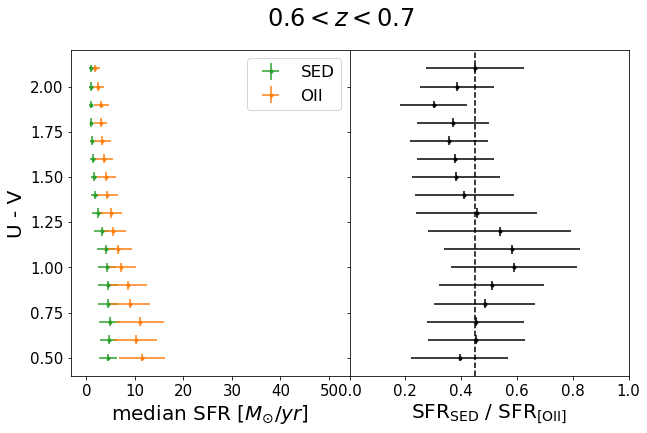

In [71]:
plt.figure(figsize=(10,6))

# 
#I might want to try the good signal for this plot 
#
#good_SIGNAL = np.where((NoiseToSignal<0.33)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))

good_SIGNAL = np.where((NoiseToSignal<0.9)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))
sel_0607, = np.where((Z>0.6)&(Z<=0.7))
good_0607 = np.intersect1d(good_SIGNAL,sel_0607)



x,y ,ex,ey= sfr_in_colour(SFR_SED_log[good_0607],UV[good_0607],median=True,log=False,clr_min=0.45,clr_max=2.2,clr_bin_size=0.1)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[good_0607],UV[good_0607],median=True,log=False,clr_min=0.45,clr_max=2.2,clr_bin_size=0.1)

rx,ry,rex,rey = sfr_ratio_in_colour(SFR_SED_log[good_0607],SFR_OII_log[good_0607],UV[good_0607],log=False,clr_min=0.45,clr_max=2.2,clr_bin_size=0.1)

#rx_corr,ry_corr,rex_corr,rey_corr = sfr_ratio_in_colour(SFR_SED_log[good_0607],SFR_OII_log[good_0607]*0.33,UV[good_0607],log=False)



ax1 = plt.subplot(121)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax1.errorbar(x,y,xerr=ex,yerr=ey,fmt=".",label='SED',c='C2')
ax1.errorbar(x1,y1,xerr=ex1,yerr=ey1,fmt=".",label='OII',c='C1')
#ax1.errorbar(x1*0.33,y1,xerr=ex1*0.33,yerr=ey1,fmt=".",label='OII x 0.33',c='C0')

ax1.set_xlabel(r'median SFR $[M_{\odot}/yr]$')
ax1.set_ylabel('U - V')

ax1.set_xlim(-3.25,54.25)


ax1.legend(fontsize='small')
#plt.show()

ax2 = plt.subplot(122)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#rat = x/x1
#rat_corr=x/(x1*0.33)
#ax2.axvline(np.median(rat_corr),c='C0',ls='--')
#ax2.axvline(1,c='k',ls='--',alpha=0.3)
#ax2.plot(rat_corr,y,".",c='C0')

ax2.axvline(np.median(rx),c='k',ls='--')


ax2.errorbar(rx,ry,xerr=rex,yerr=rey,fmt=".",c='k')
#ax2.errorbar(rx_corr,ry_corr,xerr=rex_corr,yerr=rey_corr,fmt=".",c='r')


#ax2.set_xlim(-0.4,3)
ax2.set_xlim(0.,1.)


ax2.set_xlabel(r'SFR$_{\rm{SED}}$ / SFR$_{\rm{[OII]}}$')

plt.setp(ax2.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)





plt.suptitle(r'$0.6<z<0.7$')
plt.savefig("../plots/011/SFR_COLOUR_0607_median_nocorr.PNG",bbox_inches="tight",pad_inches=0.0)
plt.savefig("../plots/paper/SFR_COLOUR_0607_median_nocorr_figA11.PNG",bbox_inches="tight",pad_inches=0.0)


plt.show()

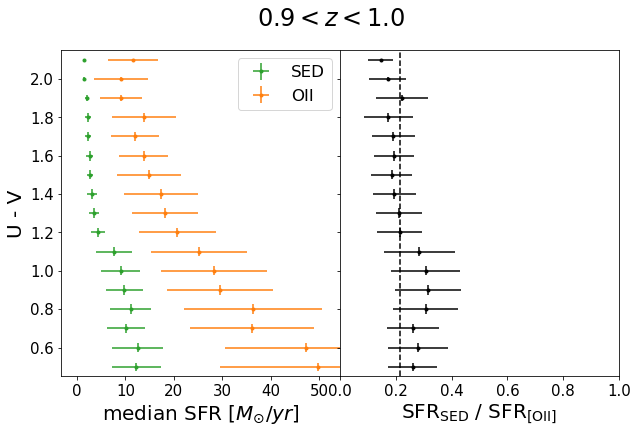

In [70]:
plt.figure(figsize=(10,6))

# 
#I might want to try the good signal for this plot 
#
#good_SIGNAL = np.where((NoiseToSignal<0.33)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))

good_SIGNAL = np.where((NoiseToSignal<0.9)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))
sel_0910, = np.where((Z>0.9)&(Z<=1.0))
good_0910 = np.intersect1d(good_SIGNAL,sel_0910)



x,y ,ex,ey= sfr_in_colour(SFR_SED_log[good_0910],UV[good_0910],median=True,log=False,clr_min=0.45,clr_max=2.2,clr_bin_size=0.1)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[good_0910],UV[good_0910],median=True,log=False,clr_min=0.45,clr_max=2.2,clr_bin_size=0.1)

rx,ry,rex,rey = sfr_ratio_in_colour(SFR_SED_log[good_0910],SFR_OII_log[good_0910],UV[good_0910],log=False,clr_min=0.45,clr_max=2.2,clr_bin_size=0.1)

#rx_corr,ry_corr,rex_corr,rey_corr = sfr_ratio_in_colour(SFR_SED_log[good_0607],SFR_OII_log[good_0607]*0.33,UV[good_0607],log=False)



ax1 = plt.subplot(121)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax1.errorbar(x,y,xerr=ex,yerr=ey,fmt=".",label='SED',c='C2')
ax1.errorbar(x1,y1,xerr=ex1,yerr=ey1,fmt=".",label='OII',c='C1')
#ax1.errorbar(x1*0.33,y1,xerr=ex1*0.33,yerr=ey1,fmt=".",label='OII x 0.33',c='C0')

ax1.set_xlabel(r'median SFR $[M_{\odot}/yr]$')
ax1.set_ylabel('U - V')

ax1.set_xlim(-3.25,54.25)


ax1.legend(fontsize='small')
#plt.show()

ax2 = plt.subplot(122)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#rat = x/x1
#rat_corr=x/(x1*0.33)
#ax2.axvline(np.median(rat_corr),c='C0',ls='--')
#ax2.axvline(1,c='k',ls='--',alpha=0.3)
#ax2.plot(rat_corr,y,".",c='C0')

ax2.axvline(np.median(rx),c='k',ls='--')


ax2.errorbar(rx,ry,xerr=rex,yerr=rey,fmt=".",c='k')
#ax2.errorbar(rx_corr,ry_corr,xerr=rex_corr,yerr=rey_corr,fmt=".",c='r')


#ax2.set_xlim(-0.4,3)
ax2.set_xlim(0.,1.)


ax2.set_xlabel(r'SFR$_{\rm{SED}}$ / SFR$_{\rm{[OII]}}$')

plt.setp(ax2.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)

plt.suptitle(r'$0.9<z<1.0$')


ax2.set_ylim(0.45,2.15)
ax1.set_ylim(0.45,2.15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("../plots/011/SFR_COLOUR_0910_median_nocorr.PNG",bbox_inches="tight",pad_inches=0.0)
plt.savefig("../plots/paper//SFR_COLOUR_0910_median_nocorr_figA11.PNG",bbox_inches="tight",pad_inches=0.0)

plt.show()

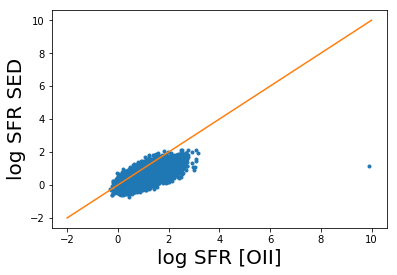

In [40]:
plt.plot(SFR_OII_log[good_SIGNAL],SFR_SED_log[good_SIGNAL],".")
plt.plot([-2,10],[-2,10])
plt.xlabel('log SFR [OII]')
plt.ylabel('log SFR SED')
#plt.savefig("../plots/011/outlier.PNG")
plt.show()

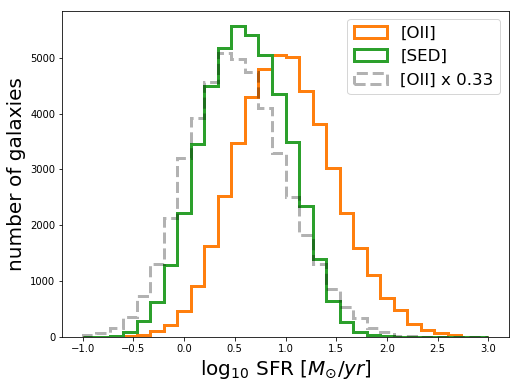

In [12]:
good_SIGNAL = np.where((NoiseToSignal<0.9)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))

plt.figure(figsize=(8,6))
plt.hist(SFR_OII_log[good_SIGNAL],range=(-1,3),bins=30,histtype='step',lw=3,label='[OII]',color='C1')
plt.hist(SFR_SED_log[good_SIGNAL],range=(-1,3),bins=30,histtype='step',lw=3,label='[SED]',color='C2')
plt.hist(SFR_OII_log[good_SIGNAL]+np.log10(0.33),range=(-1,3),bins=30,histtype='step',lw=3,label='[OII] x 0.33',color='k',alpha=0.3,ls='dashed')
plt.xlabel(r'$\log_{10}$ SFR $[M_{\odot}/yr]$')
plt.ylabel('number of galaxies')
plt.legend(fontsize='small')
plt.savefig("../plots/011/sfr_histos_paper_burst.PNG")
plt.show()

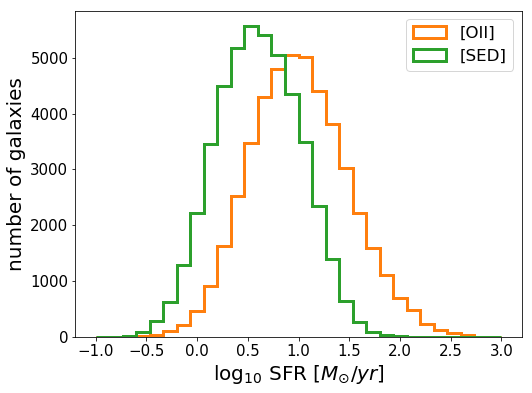

In [54]:
good_SIGNAL = np.where((NoiseToSignal<0.9)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))

plt.figure(figsize=(8,6))
plt.hist(SFR_OII_log[good_SIGNAL],range=(-1,3),bins=30,histtype='step',lw=3,label='[OII]',color='C1')
plt.hist(SFR_SED_log[good_SIGNAL],range=(-1,3),bins=30,histtype='step',lw=3,label='[SED]',color='C2')
#plt.hist(SFR_OII_log[good_SIGNAL]+np.log10(0.33),range=(-1,3),bins=30,histtype='step',lw=3,label='[OII] x 0.33',color='k',alpha=0.3,ls='dashed')
plt.xlabel(r'$\log_{10}$ SFR $[M_{\odot}/yr]$')
plt.ylabel('number of galaxies')
plt.legend(fontsize='small')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("../plots/011/sfr_histos_paper.PNG")
plt.savefig("../plots/paper/sfr_histos_paper_figA10.PNG")

plt.show()

In [42]:
SFR_OII_log[good_SIGNAL]

array([1.696, 0.951, 0.969, ..., 0.319, 1.564, 0.712], dtype=float32)

In [43]:
SFR_OII_log[good_SIGNAL]*0.33

array([0.55968004, 0.31383002, 0.31977   , ..., 0.10527001, 0.51612   ,
       0.23496002], dtype=float32)

# Fig 7 (tau mass) --> We don't want it in the paper but we want to understand if object with tau=0.1 are reliable

In [44]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    array = np.array(x)
    array = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [45]:
x,y,ey1,ey2 = median_in_bins_err(log_mass,TAU,8.5,11.5,6)

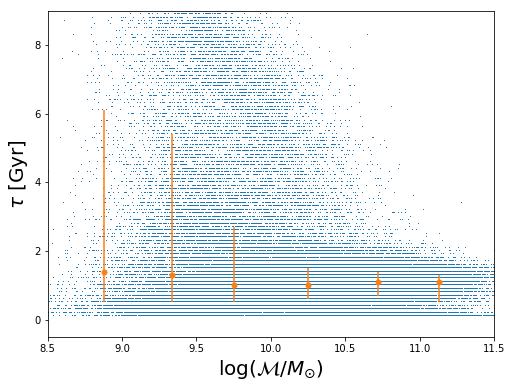

In [46]:
# Using my routine for plotting the median and the percentiles
plt.figure(figsize=(8,6))
plt.plot(log_mass,TAU,",",zorder=-20)
plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".",markersize=10)
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.xlim(8.5,11.5)
plt.ylim(-0.5,9)
plt.show()

In [47]:
def get_mean_percentiles(y,p1=0.25,p2=0.75):
    temp_ord = np.copy(y)
    temp_ord = np.sort(temp_ord)
    mean_y = np.mean(y)
    medians_y = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
    err_y_low  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y)
    err_y_high  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y)
    return mean_y,medians_y,err_y_low,err_y_high

def get_percentiles_from_median(y,p1=0.25,p2=0.75):
    temp_ord = np.copy(y)
    temp_ord = np.sort(temp_ord)
    #mean_y = np.mean(y)
    medians_y = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
    err_y_low  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-np.median(y))
    err_y_high  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-np.median(y))
    return err_y_low,err_y_high

def get_percentiles_from_mean(y,p1=0.25,p2=0.75):
    temp_ord = np.copy(y)
    temp_ord = np.sort(temp_ord)
    #mean_y = np.mean(y)
    #medians_y = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
    err_y_low  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-np.mean(y))
    err_y_high  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-np.mean(y))
    return err_y_low,err_y_high

In [48]:
#The comma makes things lists instead of np.array()
m1, = np.where(log_mass<9.0)
m2, = np.where((log_mass>=9.0)&(log_mass<9.5))
m3, = np.where((log_mass>=9.5)&(log_mass<10.))
m4, = np.where((log_mass>=10.)&(log_mass<10.5))
m5, = np.where((log_mass>=10.5)&(log_mass<11.))
m6, = np.where((log_mass>=11.))

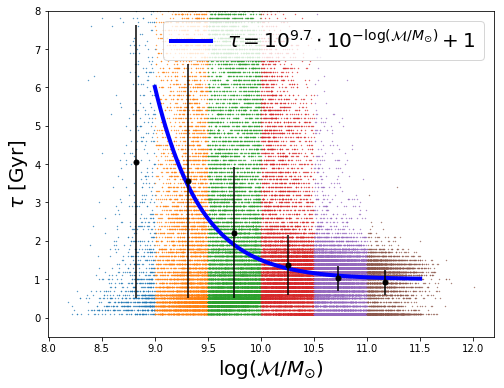

In [52]:
plt.figure(figsize=(8,6))

# THE MEAN IS GOOD TO OBTAIN THE RELATION BUT IT'S NOT FAIR BECAUSE THE MEDIAN THAT IS MORE REPRESENTATIVE 
# DOES NOT REPRODUCE THE RELATION

plt.plot(log_mass[m1],TAU[m1],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2],TAU[m2],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3],TAU[m3],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4],TAU[m4],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5],TAU[m5],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6],TAU[m6],".",zorder=-40,markersize=0.7)


#plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=np.std(TAU[m1]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=np.std(TAU[m2]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=np.std(TAU[m3]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=np.std(TAU[m4]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=np.std(TAU[m5]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=np.std(TAU[m6]),fmt=".",zorder=-20,markersize=10,color='k')


plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=[get_percentiles_from_mean(TAU[m1])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=[get_percentiles_from_mean(TAU[m2])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=[get_percentiles_from_mean(TAU[m3])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=[get_percentiles_from_mean(TAU[m4])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=[get_percentiles_from_mean(TAU[m5])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=[get_percentiles_from_mean(TAU[m6])],fmt=".",zorder=-19,markersize=10,color='k')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})} +1$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend()
plt.savefig("../plots/011/mass_tau_relation_mean.png")
plt.show()

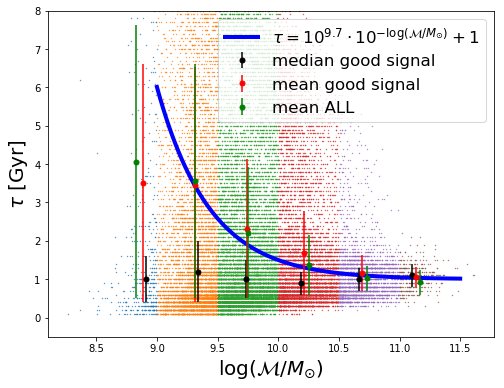

In [86]:
plt.figure(figsize=(8,6))

# 
# MEDIAN
#

good_SIGNAL = (NoiseToSignal<0.33)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf)

#good_SIGNAL = (NoiseToSignal>-1000)

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1011 = (Z>1.0)&(Z<=1.1)
sel_1013 = (Z>1.0)&(Z<=1.3)


plt.plot(log_mass[m1 & good_SIGNAL],TAU[m1 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2 & good_SIGNAL],TAU[m2 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3 & good_SIGNAL],TAU[m3 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4 & good_SIGNAL],TAU[m4 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5 & good_SIGNAL],TAU[m5 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6 & good_SIGNAL],TAU[m6 & good_SIGNAL],".",zorder=-40,markersize=0.7)


#plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=np.std(TAU[m1]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=np.std(TAU[m2]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=np.std(TAU[m3]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=np.std(TAU[m4]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=np.std(TAU[m5]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=np.std(TAU[m6]),fmt=".",zorder=-20,markersize=10,color='k')


plt.errorbar(np.median(log_mass[m1 & good_SIGNAL]),np.median(TAU[m1 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m1 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k',label='median good signal')
plt.errorbar(np.median(log_mass[m2 & good_SIGNAL]),np.median(TAU[m2 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m2 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m3 & good_SIGNAL]),np.median(TAU[m3 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m3 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m4 & good_SIGNAL]),np.median(TAU[m4 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m4 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m5 & good_SIGNAL]),np.median(TAU[m5 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m5 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m6 & good_SIGNAL]),np.median(TAU[m6 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m6 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')

plt.errorbar(np.mean(log_mass[m1 & good_SIGNAL]),np.mean(TAU[m1 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m1 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r',label='mean good signal')
plt.errorbar(np.mean(log_mass[m2 & good_SIGNAL]),np.mean(TAU[m2 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m2 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m3 & good_SIGNAL]),np.mean(TAU[m3 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m3 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m4 & good_SIGNAL]),np.mean(TAU[m4 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m4 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m5 & good_SIGNAL]),np.mean(TAU[m5 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m5 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m6 & good_SIGNAL]),np.mean(TAU[m6 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m6 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')

plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=[get_percentiles_from_mean(TAU[m1])],fmt=".",zorder=-19,markersize=10,color='g',label='mean ALL')
plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=[get_percentiles_from_mean(TAU[m2])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=[get_percentiles_from_mean(TAU[m3])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=[get_percentiles_from_mean(TAU[m4])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=[get_percentiles_from_mean(TAU[m5])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=[get_percentiles_from_mean(TAU[m6])],fmt=".",zorder=-19,markersize=10,color='g')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})} +1$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend(fontsize='small')
plt.savefig("../plots/011/mass_tau_relation_median_good_signal_ALL.png")
plt.show()

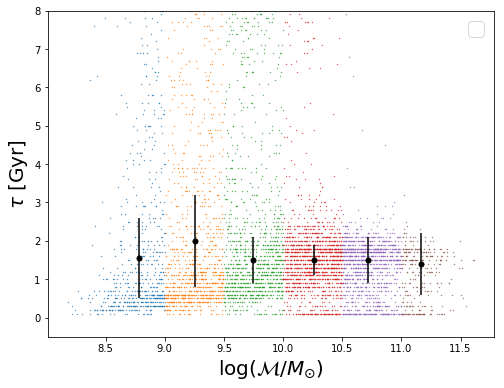

In [655]:
plt.figure(figsize=(8,6))

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1013 = (Z>1.0)&(Z<=1.3)

plt.plot(log_mass[m1 & sel_0405],TAU[m1 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2 & sel_0405],TAU[m2 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3 & sel_0405],TAU[m3 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4 & sel_0405],TAU[m4 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5 & sel_0405],TAU[m5 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6 & sel_0405],TAU[m6 & sel_0405],".",zorder=-40,markersize=0.7)

plt.errorbar(np.mean(log_mass[m1 & sel_0405]),np.median(TAU[m1 & sel_0405]),yerr=[get_percentiles(TAU[m1 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m2 & sel_0405]),np.median(TAU[m2 & sel_0405]),yerr=[get_percentiles(TAU[m2 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m3 & sel_0405]),np.median(TAU[m3 & sel_0405]),yerr=[get_percentiles(TAU[m3 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m4 & sel_0405]),np.median(TAU[m4 & sel_0405]),yerr=[get_percentiles(TAU[m4 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m5 & sel_0405]),np.median(TAU[m5 & sel_0405]),yerr=[get_percentiles(TAU[m5 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m6 & sel_0405]),np.median(TAU[m6 & sel_0405]),yerr=[get_percentiles(TAU[m6 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

#plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})}$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend()
#plt.savefig("../plots/011/mass_tau_relation_0405.png")
plt.show()

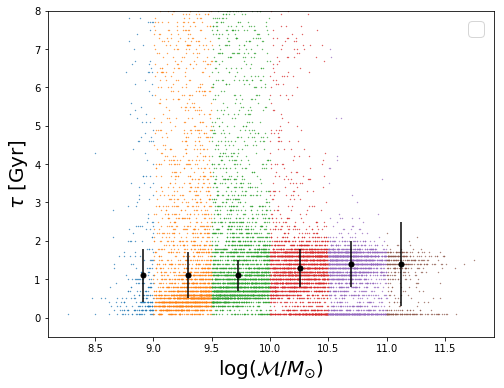

In [656]:
plt.figure(figsize=(8,6))

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1013 = (Z>1.0)&(Z<=1.3)

plt.plot(log_mass[m1 & sel_0506],TAU[m1 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2 & sel_0506],TAU[m2 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3 & sel_0506],TAU[m3 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4 & sel_0506],TAU[m4 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5 & sel_0506],TAU[m5 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6 & sel_0506],TAU[m6 & sel_0506],".",zorder=-40,markersize=0.7)

plt.errorbar(np.median(log_mass[m1 & sel_0506]),np.median(TAU[m1 & sel_0506]),yerr=[get_percentiles(TAU[m1 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m2 & sel_0506]),np.median(TAU[m2 & sel_0506]),yerr=[get_percentiles(TAU[m2 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m3 & sel_0506]),np.median(TAU[m3 & sel_0506]),yerr=[get_percentiles(TAU[m3 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m4 & sel_0506]),np.median(TAU[m4 & sel_0506]),yerr=[get_percentiles(TAU[m4 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m5 & sel_0506]),np.median(TAU[m5 & sel_0506]),yerr=[get_percentiles(TAU[m5 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m6 & sel_0506]),np.median(TAU[m6 & sel_0506]),yerr=[get_percentiles(TAU[m6 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

#plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})}$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend()
#plt.savefig("../plots/011/mass_tau_relation_0506.png")
plt.show()

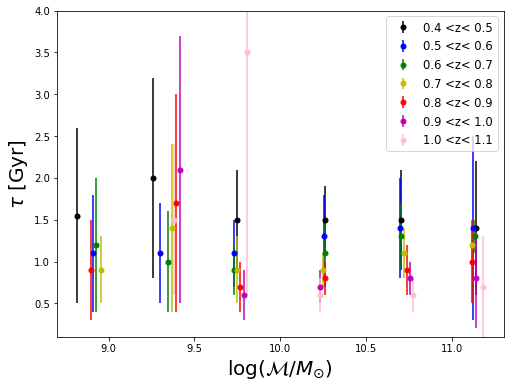

In [707]:
plt.figure(figsize=(8,6))

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1011 = (Z>1.0)&(Z<=1.1)


plt.errorbar(np.median(log_mass[m1 & sel_0405]),np.median(TAU[m1 & sel_0405]),yerr=[get_percentiles(TAU[m1 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k',label='0.4 <z< 0.5')
plt.errorbar(np.median(log_mass[m2 & sel_0405]),np.median(TAU[m2 & sel_0405]),yerr=[get_percentiles(TAU[m2 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m3 & sel_0405]),np.median(TAU[m3 & sel_0405]),yerr=[get_percentiles(TAU[m3 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m4 & sel_0405]),np.median(TAU[m4 & sel_0405]),yerr=[get_percentiles(TAU[m4 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m5 & sel_0405]),np.median(TAU[m5 & sel_0405]),yerr=[get_percentiles(TAU[m5 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m6 & sel_0405]),np.median(TAU[m6 & sel_0405]),yerr=[get_percentiles(TAU[m6 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')

plt.errorbar(np.median(log_mass[m1 & sel_0506]),np.median(TAU[m1 & sel_0506]),yerr=[get_percentiles(TAU[m1 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b',label='0.5 <z< 0.6')
plt.errorbar(np.median(log_mass[m2 & sel_0506]),np.median(TAU[m2 & sel_0506]),yerr=[get_percentiles(TAU[m2 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m3 & sel_0506]),np.median(TAU[m3 & sel_0506]),yerr=[get_percentiles(TAU[m3 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m4 & sel_0506]),np.median(TAU[m4 & sel_0506]),yerr=[get_percentiles(TAU[m4 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m5 & sel_0506]),np.median(TAU[m5 & sel_0506]),yerr=[get_percentiles(TAU[m5 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m6 & sel_0506]),np.median(TAU[m6 & sel_0506]),yerr=[get_percentiles(TAU[m6 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')

plt.errorbar(np.median(log_mass[m1 & sel_0607]),np.median(TAU[m1 & sel_0607]),yerr=[get_percentiles(TAU[m1 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g',label='0.6 <z< 0.7')
plt.errorbar(np.median(log_mass[m2 & sel_0607]),np.median(TAU[m2 & sel_0607]),yerr=[get_percentiles(TAU[m2 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m3 & sel_0607]),np.median(TAU[m3 & sel_0607]),yerr=[get_percentiles(TAU[m3 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m4 & sel_0607]),np.median(TAU[m4 & sel_0607]),yerr=[get_percentiles(TAU[m4 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m5 & sel_0607]),np.median(TAU[m5 & sel_0607]),yerr=[get_percentiles(TAU[m5 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m6 & sel_0607]),np.median(TAU[m6 & sel_0607]),yerr=[get_percentiles(TAU[m6 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')

plt.errorbar(np.median(log_mass[m1 & sel_0708]),np.median(TAU[m1 & sel_0708]),yerr=[get_percentiles(TAU[m1 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y',label='0.7 <z< 0.8')
plt.errorbar(np.median(log_mass[m2 & sel_0708]),np.median(TAU[m2 & sel_0708]),yerr=[get_percentiles(TAU[m2 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m3 & sel_0708]),np.median(TAU[m3 & sel_0708]),yerr=[get_percentiles(TAU[m3 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m4 & sel_0708]),np.median(TAU[m4 & sel_0708]),yerr=[get_percentiles(TAU[m4 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m5 & sel_0708]),np.median(TAU[m5 & sel_0708]),yerr=[get_percentiles(TAU[m5 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m6 & sel_0708]),np.median(TAU[m6 & sel_0708]),yerr=[get_percentiles(TAU[m6 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')

plt.errorbar(np.median(log_mass[m1 & sel_0809]),np.median(TAU[m1 & sel_0809]),yerr=[get_percentiles(TAU[m1 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r',label='0.8 <z< 0.9')
plt.errorbar(np.median(log_mass[m2 & sel_0809]),np.median(TAU[m2 & sel_0809]),yerr=[get_percentiles(TAU[m2 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m3 & sel_0809]),np.median(TAU[m3 & sel_0809]),yerr=[get_percentiles(TAU[m3 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m4 & sel_0809]),np.median(TAU[m4 & sel_0809]),yerr=[get_percentiles(TAU[m4 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m5 & sel_0809]),np.median(TAU[m5 & sel_0809]),yerr=[get_percentiles(TAU[m5 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m6 & sel_0809]),np.median(TAU[m6 & sel_0809]),yerr=[get_percentiles(TAU[m6 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')

#plt.errorbar(np.median(log_mass[m1 & sel_0910]),np.median(TAU[m1 & sel_0910]),yerr=[get_percentiles(TAU[m1 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m2 & sel_0910]),np.median(TAU[m2 & sel_0910]),yerr=[get_percentiles(TAU[m2 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m3 & sel_0910]),np.median(TAU[m3 & sel_0910]),yerr=[get_percentiles(TAU[m3 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m',label='0.9 <z< 1.0')
plt.errorbar(np.median(log_mass[m4 & sel_0910]),np.median(TAU[m4 & sel_0910]),yerr=[get_percentiles(TAU[m4 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m5 & sel_0910]),np.median(TAU[m5 & sel_0910]),yerr=[get_percentiles(TAU[m5 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m6 & sel_0910]),np.median(TAU[m6 & sel_0910]),yerr=[get_percentiles(TAU[m6 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')

#plt.errorbar(np.median(log_mass[m1 & sel_1011]),np.median(TAU[m1 & sel_1011]),yerr=[get_percentiles(TAU[m1 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m2 & sel_1011]),np.median(TAU[m2 & sel_1011]),yerr=[get_percentiles(TAU[m2 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m3 & sel_1011]),np.median(TAU[m3 & sel_1011]),yerr=[get_percentiles(TAU[m3 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink',label='1.0 <z< 1.1')
plt.errorbar(np.median(log_mass[m4 & sel_1011]),np.median(TAU[m4 & sel_1011]),yerr=[get_percentiles(TAU[m4 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m5 & sel_1011]),np.median(TAU[m5 & sel_1011]),yerr=[get_percentiles(TAU[m5 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m6 & sel_1011]),np.median(TAU[m6 & sel_1011]),yerr=[get_percentiles(TAU[m6 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')



xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

#plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})}$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(0.1,4)
plt.legend(fontsize='xx-small',loc=1)
plt.savefig("../plots/011/mass_tau_relation_redshifts_median.png")
plt.show()

In [691]:
s = sel_0910 & m1

In [692]:
np.where(s==True)

(array([70715]),)

In [674]:
len(np.where(sel_0809==True)[0])

10289

In [675]:
len(np.where(sel_0910==True)[0])

6557

In [677]:
len(np.where(m6==True)[0])

5068

In [604]:
len(log_mass[sel_0607 & m6])

799

In [580]:
np.unique((log_mass[m6]-log_mass[sel_0607 and m6]))

array([0.])

In [582]:
m1 and m2

(array([    2,     9,    11, ..., 73137, 73143, 73154]),)

In [584]:
m1

(array([   38,    92,   178, ..., 73098, 73113, 73156]),)

In [585]:
m2

(array([    2,     9,    11, ..., 73137, 73143, 73154]),)

In [512]:
get_percentiles(TAU[m1])

(3.9578905, 20.84211)

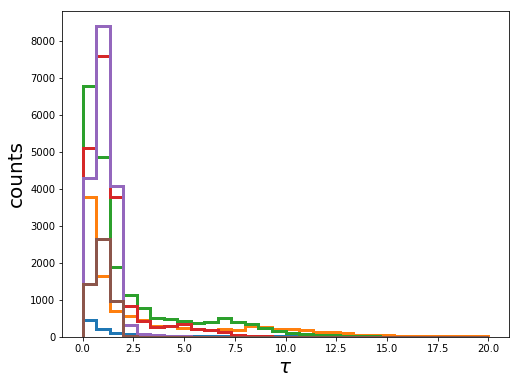

In [733]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m2],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m3],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m4],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m5],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m6],bins=30,histtype='step',lw=3,range=(0,20))
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.savefig("../plots/011/histo_taus_for_masses.png")
plt.show()

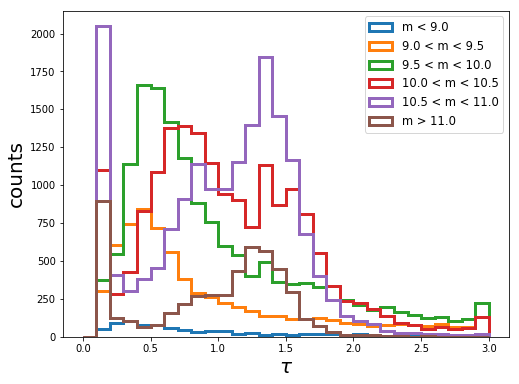

In [736]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m < 9.0')
plt.hist(TAU[m2],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.0 < m < 9.5')
plt.hist(TAU[m3],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.5 < m < 10.0')
plt.hist(TAU[m4],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.0 < m < 10.5')
plt.hist(TAU[m5],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.5 < m < 11.0')
plt.hist(TAU[m6],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m > 11.0')
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.legend(fontsize='xx-small')
plt.savefig("../plots/011/histo_taus_for_masses_zoom.png")
plt.show()

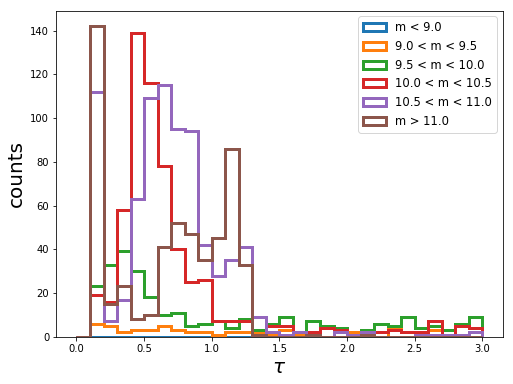

In [738]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m < 9.0')
plt.hist(TAU[m2& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.0 < m < 9.5')
plt.hist(TAU[m3& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.5 < m < 10.0')
plt.hist(TAU[m4& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.0 < m < 10.5')
plt.hist(TAU[m5& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.5 < m < 11.0')
plt.hist(TAU[m6& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m > 11.0')
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.legend(fontsize='xx-small')
plt.savefig("../plots/011/histo_taus_for_masses_zoom_1011.png")
plt.show()

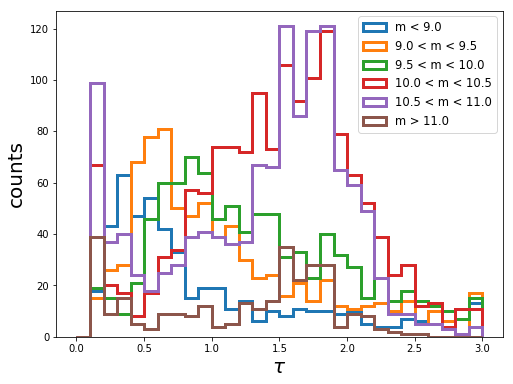

In [740]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m < 9.0')
plt.hist(TAU[m2 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.0 < m < 9.5')
plt.hist(TAU[m3 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.5 < m < 10.0')
plt.hist(TAU[m4 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.0 < m < 10.5')
plt.hist(TAU[m5 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.5 < m < 11.0')
plt.hist(TAU[m6 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m > 11.0')
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.legend(fontsize='xx-small')
plt.savefig("../plots/011/histo_taus_for_masses_zoom_0405.png")
plt.show()

In [490]:
np.linspace(9.,11.5,100)

array([ 9.        ,  9.02525253,  9.05050505,  9.07575758,  9.1010101 ,
        9.12626263,  9.15151515,  9.17676768,  9.2020202 ,  9.22727273,
        9.25252525,  9.27777778,  9.3030303 ,  9.32828283,  9.35353535,
        9.37878788,  9.4040404 ,  9.42929293,  9.45454545,  9.47979798,
        9.50505051,  9.53030303,  9.55555556,  9.58080808,  9.60606061,
        9.63131313,  9.65656566,  9.68181818,  9.70707071,  9.73232323,
        9.75757576,  9.78282828,  9.80808081,  9.83333333,  9.85858586,
        9.88383838,  9.90909091,  9.93434343,  9.95959596,  9.98484848,
       10.01010101, 10.03535354, 10.06060606, 10.08585859, 10.11111111,
       10.13636364, 10.16161616, 10.18686869, 10.21212121, 10.23737374,
       10.26262626, 10.28787879, 10.31313131, 10.33838384, 10.36363636,
       10.38888889, 10.41414141, 10.43939394, 10.46464646, 10.48989899,
       10.51515152, 10.54040404, 10.56565657, 10.59090909, 10.61616162,
       10.64141414, 10.66666667, 10.69191919, 10.71717172, 10.74

In [632]:
annas_arr = np.arange(100)
a = np.where(annas_arr < 20)
b = np.where(annas_arr%5 == 0)
print annas_arr[a],annas_arr[b]
c = np.intersect1d(a,b)



d = ((annas_arr< 20) & (annas_arr%5 == 0))
#print annas_arr[a & b]
print annas_arr[c]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
[ 0  5 10 15]


In [622]:
np.array(b)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [730]:
212/4

53

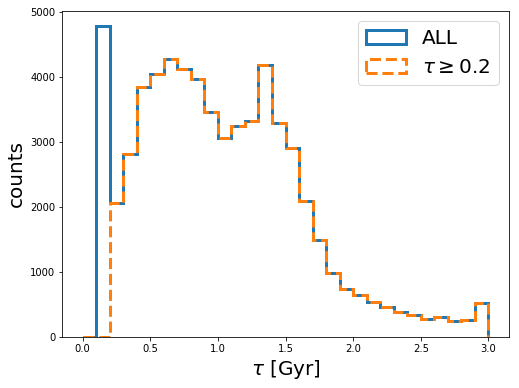

In [80]:
plt.figure(figsize=(8,6))
plt.hist(TAU,bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='ALL')
plt.hist(TAU[TAU>0.1],bins=30,normed=False,histtype='step',lw=3,range=(0,3),ls='dashed',label=r'$\tau \geq 0.2$')
plt.xlabel(r"$\tau$ [Gyr]")
plt.ylabel("counts")
plt.legend()
plt.savefig("../plots/011/taus_02.png")
plt.show()

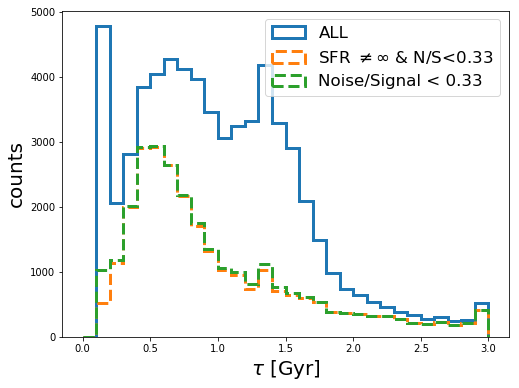

In [92]:
plt.figure(figsize=(8,6))
plt.hist(TAU,bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='ALL')
plt.hist(TAU[good_SIGNAL],bins=30,normed=False,histtype='step',lw=3,range=(0,3),ls='dashed',label=r'SFR $\neq \infty$ & N/S<0.33')
plt.hist(TAU[NoiseToSignal<0.33],bins=30,normed=False,histtype='step',lw=3,range=(0,3),ls='dashed',label='Noise/Signal < 0.33')
plt.xlabel(r"$\tau$ [Gyr]")
plt.ylabel("counts")
plt.legend(fontsize='small')
plt.savefig("../plots/011/taus_good_033.png")
plt.show()

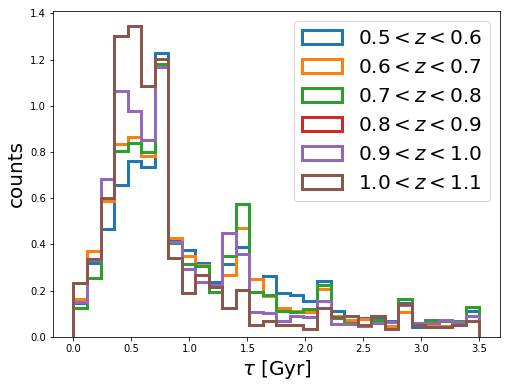

In [134]:
plt.figure(figsize=(8,6))
#plt.hist(TAU[good_SIGNAL],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='ALL')
#plt.hist(TAU[good_SIGNAL & sel_0405],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.4<z<0.5$')
plt.hist(TAU[good_SIGNAL & sel_0506],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.5<z<0.6$')
plt.hist(TAU[good_SIGNAL & sel_0607],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.6<z<0.7$')
plt.hist(TAU[good_SIGNAL & sel_0708],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.7<z<0.8$')
plt.hist(TAU[good_SIGNAL & sel_0809],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.8<z<0.9$')
plt.hist(TAU[good_SIGNAL & sel_0809],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.9<z<1.0$')
plt.hist(TAU[good_SIGNAL & sel_1011],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$1.0<z<1.1$')

plt.xlabel(r"$\tau$ [Gyr]")
plt.ylabel("counts")
plt.legend()
plt.savefig("../plots/011/taus_good_histo_z.png")
plt.show()

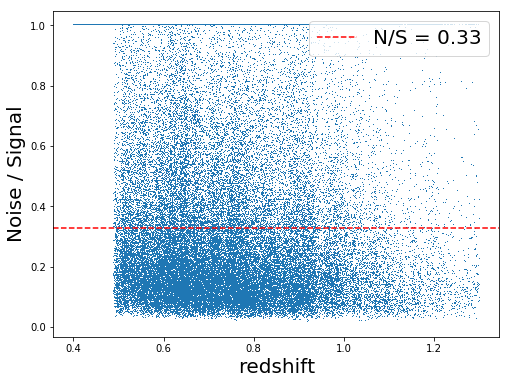

In [133]:
plt.figure(figsize=(8,6))
plt.plot(Z[NoiseToSignal<99],NoiseToSignal[NoiseToSignal<99],",")
plt.axhline(0.33,c="r",ls='dashed',label='N/S = 0.33')
plt.xlabel('redshift')
plt.ylabel('Noise / Signal')
plt.legend(loc=1)
plt.savefig('../plots/011/noise_to_signal_redshift.png')
plt.show()

In [129]:
print(len(Z[NoiseToSignal<0.33]))
print(len(Z))
print(len(Z[NoiseToSignal<0.33])/float(len(Z)))

36616
73160
0.500492072171


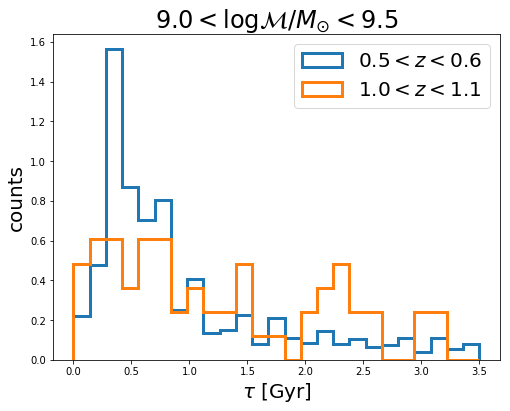

In [147]:
plt.figure(figsize=(8,6))

#plt.hist(TAU[good_SIGNAL & sel_0405],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.4<z<0.5$')
plt.hist(TAU[good_SIGNAL & sel_0506 & m2],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.5<z<0.6$')
#plt.hist(TAU[good_SIGNAL & sel_0607 & m2],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.6<z<0.7$')
#plt.hist(TAU[good_SIGNAL & sel_0708 & m2],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.7<z<0.8$')
#plt.hist(TAU[good_SIGNAL & sel_0809 & m2],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.8<z<0.9$')
#plt.hist(TAU[good_SIGNAL & sel_0809 & m2],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.9<z<1.0$')
plt.hist(TAU[good_SIGNAL & sel_1011 & m2],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$1.0<z<1.1$')

plt.title(r"$9.0 < \log \mathcal{M} / M_{\odot} < 9.5$")

plt.xlabel(r"$\tau$ [Gyr]")
plt.ylabel("counts")
plt.legend()
plt.savefig("../plots/011/taus_good_histo_z_m2.png")
plt.show()

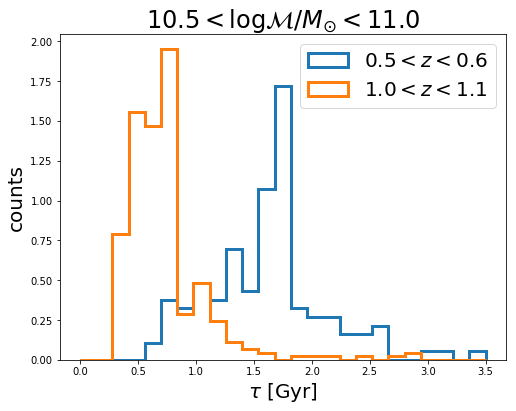

In [146]:
plt.figure(figsize=(8,6))

#plt.hist(TAU[good_SIGNAL & sel_0405],bins=30,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.4<z<0.5$')
plt.hist(TAU[good_SIGNAL & sel_0506 & m5],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.5<z<0.6$')
#plt.hist(TAU[good_SIGNAL & sel_0607 & m5],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.6<z<0.7$')
#plt.hist(TAU[good_SIGNAL & sel_0708 & m5],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.7<z<0.8$')
#plt.hist(TAU[good_SIGNAL & sel_0809 & m5],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.8<z<0.9$')
#plt.hist(TAU[good_SIGNAL & sel_0809 & m5],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$0.9<z<1.0$')
plt.hist(TAU[good_SIGNAL & sel_1011 & m5],bins=25,normed=True,histtype='step',lw=3,range=(0,3.5),label=r'$1.0<z<1.1$')

plt.title(r"$10.5 < \log \mathcal{M} / M_{\odot} < 11.0$")

plt.xlabel(r"$\tau$ [Gyr]")
plt.ylabel("counts")
plt.legend()
plt.savefig("../plots/011/taus_good_histo_z_m5.png")
plt.show()

# Understanding redshift of formation

In [187]:
from astropy.cosmology import FlatLambdaCDM, z_at_value # you can also import WMAP7
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70,Om0=0.3)

In [188]:
print cosmo.age(z=0.45)
print cosmo.age(z=1.1)
print cosmo.age(z=0.45)-cosmo.age(z=1.1)

8.79363371196 Gyr
5.3754427261 Gyr
3.41819098586 Gyr


In [207]:
z_at_value(cosmo.age,13.46*u.Gyr) #13.47 ~ age of the uiverse if H(0)=70 and Om=0.3


0.000500159460252645

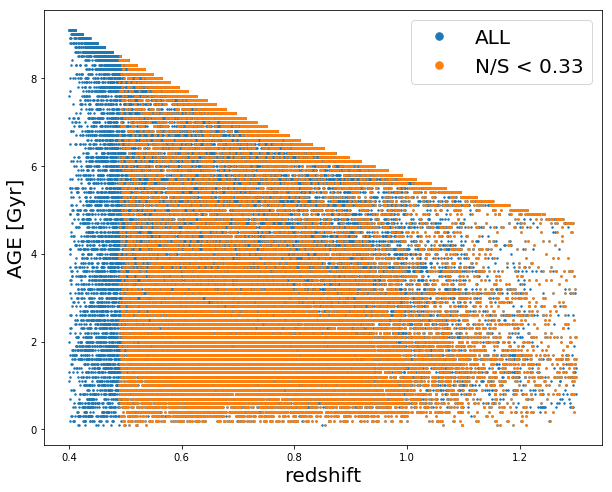

In [168]:
plt.figure(figsize=(10,8))
plt.plot(Z,AGE,'.',markersize=3,label='ALL')
plt.plot(Z[good_SIGNAL],AGE[good_SIGNAL],'.',markersize=3,label='N/S < 0.33')
plt.xlabel('redshift')
plt.ylabel('AGE [Gyr]')
plt.legend(markerscale=5)
plt.savefig('../plots/011/AGE_Z.png')
plt.show()

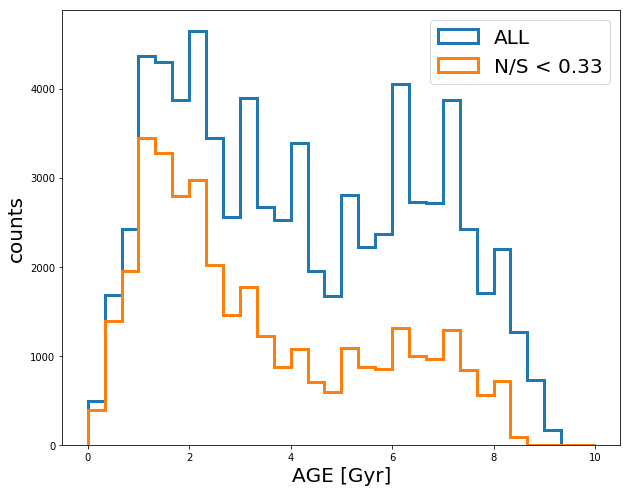

In [176]:
plt.figure(figsize=(10,8))
plt.hist(AGE,bins=30,normed=False,histtype='step',lw=3,range=(0,10),label='ALL')
plt.hist(AGE[good_SIGNAL],bins=30,normed=False,histtype='step',lw=3,range=(0,10),label='N/S < 0.33')
plt.xlabel('AGE [Gyr]')
plt.ylabel('counts')
plt.legend()
plt.savefig('../plots/011/AGE_HISTO.png')
plt.show()

In [213]:
COSMO_TIMES = cosmo.age(z=Z).value

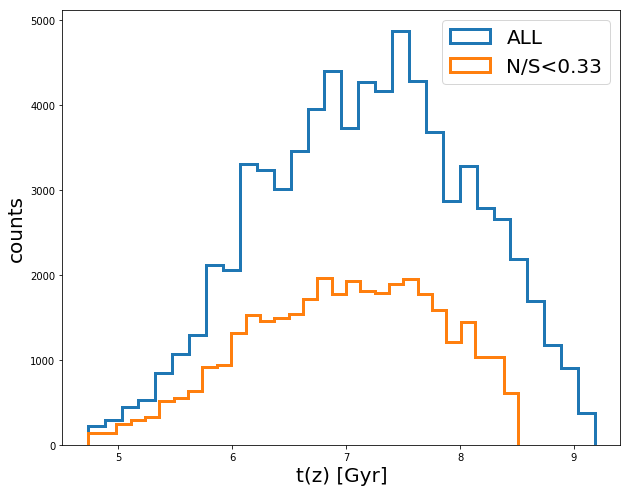

In [385]:
plt.figure(figsize=(10,8))
plt.hist(COSMO_TIMES,bins=30,normed=False,histtype='step',lw=3,label='ALL')
plt.hist(COSMO_TIMES[good_SIGNAL],bins=30,normed=False,histtype='step',lw=3,label='N/S<0.33')
plt.xlabel('t(z) [Gyr]')
plt.ylabel('counts')
plt.legend()
plt.savefig('../plots/011/cosmological_times.png')
plt.show()

In [252]:
cosmo.age(z=1).value

5.7516469434010205

In [242]:
t_form = COSMO_TIMES-AGE

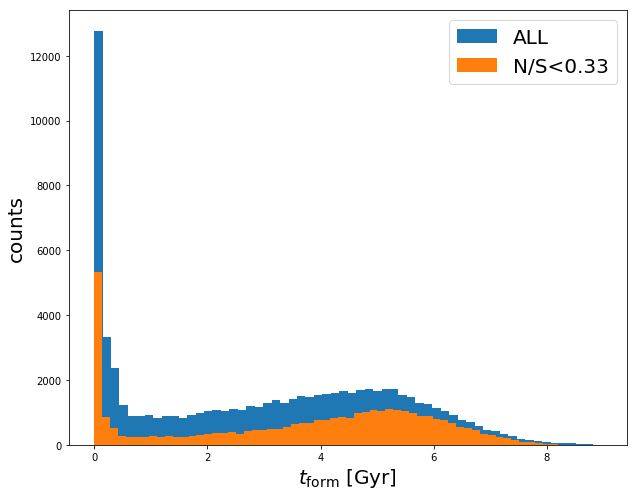

In [380]:
plt.figure(figsize=(10,8))
plt.hist(t_form,bins=60             ,label='ALL')
plt.hist(t_form[good_SIGNAL],bins=60,label='N/S<0.33')
plt.xlabel(r'$t_{\rm{form}}$ [Gyr]')
plt.ylabel('counts')
#plt.axvline(stats.mode(t_form)[0])
#plt.axvline(stats.mode(t_form[good_SIGNAL])[0])
plt.legend()
plt.savefig('../plots/011/t_form_histo.png')
plt.show()

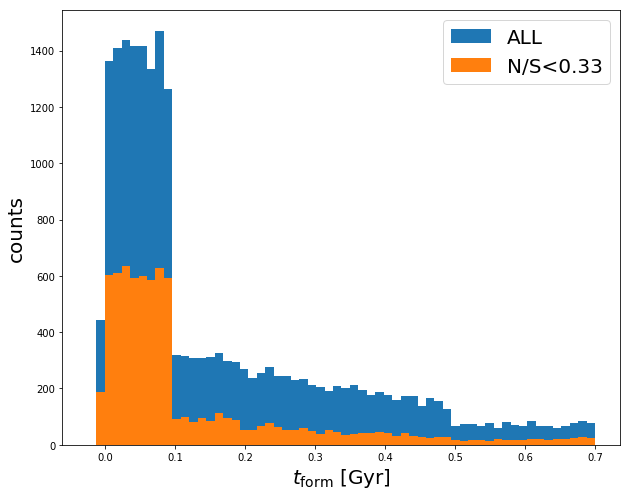

In [532]:
plt.figure(figsize=(10,8))
plt.hist(t_form,bins=60,range=(-0.025,0.7),label='ALL')
#plt.hist(t_form,bins=60,range=(-0.125,0.07),label='ALL')
plt.hist(t_form[good_SIGNAL],bins=60,range=(-0.025,0.7),label='N/S<0.33')
plt.xlabel(r'$t_{\rm{form}}$ [Gyr]')
plt.ylabel('counts')
plt.legend()
#plt.savefig('../plots/011/t_form_histo_zoom.png')
plt.show()

In [280]:
z_form = np.zeros(len(t_form))
for i in range(len(t_form)):
    if t_form[i]>=0.001:
        z_form[i] = z_at_value(cosmo.age,t_form[i]*u.Gyr)
    else:
        z_form[i] = 1000

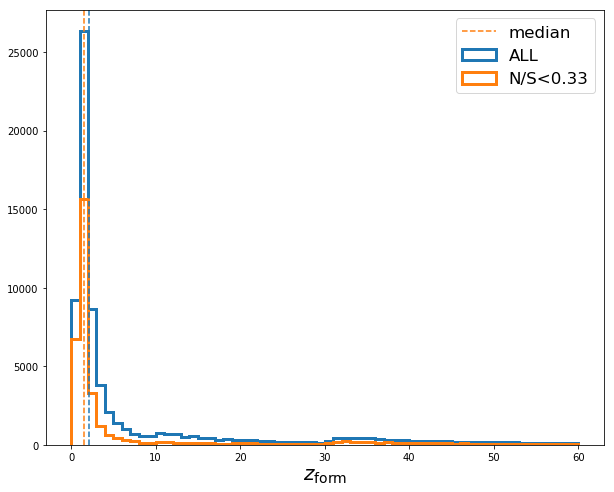

In [382]:
plt.figure(figsize=(10,8))
plt.hist(z_form,bins=60,lw=3,histtype='step',color='C0',label='ALL',range=(0,60))
plt.hist(z_form[good_SIGNAL],bins=60,lw=3,histtype='step',color='C1',label='N/S<0.33',range=(0,60))
plt.axvline(np.median(z_form),color='C0',ls='dashed')
plt.axvline(np.median(z_form[good_SIGNAL]),color='C1',ls='dashed',label='median')
#plt.axvline(stats.mode(z_form[z_form<10])[0],color='C0',label='mode < 10')
#plt.axvline(stats.mode(z_form[good_SIGNAL][z_form[good_SIGNAL]<10])[0],color='C1')
plt.xlabel(r'$z_{\rm{form}}$')
plt.legend(fontsize='small')
plt.savefig('../plots/011/z_form_histo.png')
plt.show()

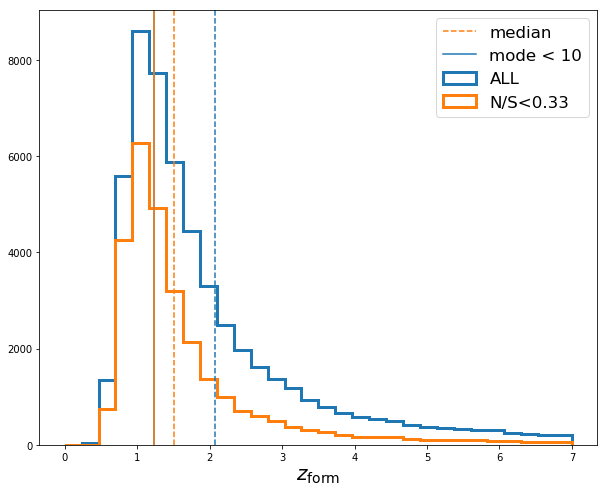

In [383]:
plt.figure(figsize=(10,8))
plt.hist(z_form,bins=30,lw=3,histtype='step',range=(0,7),color='C0',label='ALL')
plt.hist(z_form[good_SIGNAL],bins=30,lw=3,histtype='step',range=(0,7),color='C1',label='N/S<0.33')
plt.axvline(np.median(z_form),color='C0',ls='dashed')
plt.axvline(np.median(z_form[good_SIGNAL]),color='C1',ls='dashed',label='median')
plt.axvline(stats.mode(z_form[z_form<10])[0],color='C0',label='mode < 10')
plt.axvline(stats.mode(z_form[good_SIGNAL][z_form[good_SIGNAL]<10])[0],color='C1')
plt.xlabel(r'$z_{\rm{form}}$')
plt.legend(fontsize='small')
plt.savefig('../plots/011/z_form_histo_zoom.png')
plt.show()

In [356]:
print stats.mode(z_form[z_form<10])[0]
print stats.mode(z_form[good_SIGNAL][z_form[good_SIGNAL]<10])[0]

[1.23742105]
[1.23742105]


In [388]:
print len((t_form[t_form<0.001]))
print len(z_form[z_form==1000])
print len(z_form[z_form==1000])/float(len(z_form))

623
623
0.0085155822854


In [391]:
(stats.mode(z_form[z_form<10]))

ModeResult(mode=array([1.23742105]), count=array([5]))

# Luminosity function Fritz 2014

In [392]:
def Schecter(M,p0,M0,alpha):
    return 0.4*np.log(10)*p0*(10**(0.4*(M0-M)))**(alpha+1)*np.exp(-10**(0.4*(M0-M)))

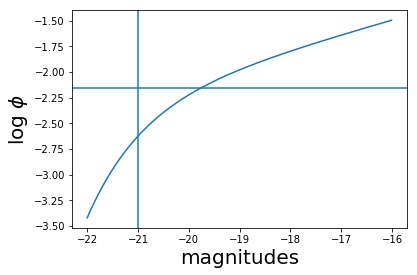

In [404]:
x = np.arange(-24.5,-19,0.01)
plt.plot(x,np.log10(Schecter(x,7*10**(-3),-21,-1.35)))
plt.axvline(-21)
#plt.plot(x,-1.35*x)
plt.axhline(np.log10(7*10**(-3)))
plt.xlabel('magnitudes')
plt.ylabel(r'log $\phi$')
plt.show()

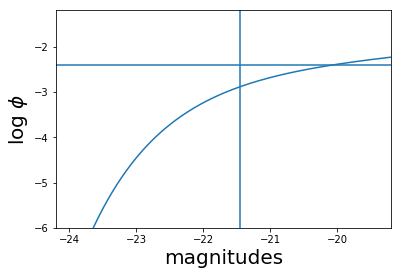

In [420]:
x = np.arange(-24.2,-19.2,0.001)
plt.xlim(-24.2,-19.2)
plt.ylim(-6,-1.2)
plt.plot(x,np.log10(Schecter(x,p0=11.27*10**(-3)*0.7**3,M0=-20.67+5*np.log10(0.7),alpha=-1.3)))
plt.axvline(-20.67+5*np.log10(0.7))
#plt.plot(x,-1.35*x)
plt.axhline(np.log10(11.27*10**(-3)*0.7**3))
plt.xlabel('magnitudes')
plt.ylabel(r'log $\phi$')
plt.show()

In [479]:
def plot_Schect_mag(p0,M0,alpha,h=1,fig=0,m_bright=-24.3,m_weak=-19.1,lines=False,label='Schechter'):
    canvas = plt.figure(fig,figsize=(10,8))
    x = np.arange(m_bright,m_weak,0.001)
    plt.xlim(m_bright,m_weak)
    plt.ylim(-6.1,-1.1)
    plt.plot(x,np.log10(Schecter(x,p0=p0*h**3,M0=M0+5*np.log10(h),alpha=alpha)),label=label)
    if lines:
        plt.axvline(M0+5*np.log10(h),ls='dashed')
        plt.axhline(np.log10(p0*h**3),ls='dashed')
    plt.xlabel(r'$M_{B_{AB}}$ (h = '+str(h)+")")
    plt.ylabel(r'log $\phi \;[(h=$'+str(h)+r'$)^3 \, \rm{Mpc}^{-3}]$')
    return canvas

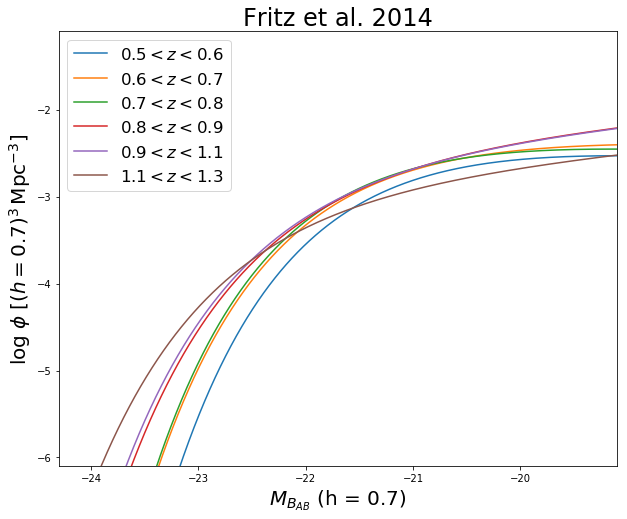

In [508]:
plot_Schect_mag(p0=16.21*10**(-3),M0=-19.98,alpha=-0.78,h=0.7,label=r'$0.5<z<0.6$')
plot_Schect_mag(p0=17.70*10**(-3),M0=-20.20,alpha=-0.90,h=0.7,label=r'$0.6<z<0.7$')
plot_Schect_mag(p0=18.44*10**(-3),M0=-20.19,alpha=-0.81,h=0.7,label=r'$0.7<z<0.8$')
plot_Schect_mag(p0=11.93*10**(-3),M0=-20.61,alpha=-1.29,h=0.7,label=r'$0.8<z<0.9$')
plot_Schect_mag(p0=11.27*10**(-3),M0=-20.67,alpha=-1.30,h=0.7,label=r'$0.9<z<1.1$')
plot_Schect_mag(p0=04.90*10**(-3),M0=-21.02,alpha=-1.30,h=0.7,label=r'$1.1<z<1.3$')
plt.legend(fontsize='small')

plt.title('Fritz et al. 2014')

#plt.axhline(-2.4)
#plt.axhline(-2.6)

plt.savefig('../plots/011/luminosity_function_fritz.png')

plt.show()

# Luminosity function in Galform

In [489]:
cosmo.comoving_volume(z=1.1734)

<Quantity 2.13082934e+11 Mpc3>

However the comoving volume of the Galform MillGas run is a box with a side of 500 Mpc/h $\Rightarrow$ Vol = (500 Mpc/h)$^3$

In [544]:
def QUERY_VIRGO_in_file(mag='mag_B_ext',snap_num=37,file_name="../data/mag_B_ext_37.txt"):
    '''I can use this function to query the VIRGO database and obtain a specified magnitude from Gonzalez+14 at a specified snapshot which will be saved in the specified txt file'''
    from virgodb import VirgoDB
    vdb = VirgoDB("giorgio",password="BN401kmd")
    Q =  'SELECT '
    Q += ' '+mag+' '
    Q += 'FROM '
    Q += '   Gonzalez2014a..mr7 '
    Q += 'WHERE '
    Q += '   snapnum = '+str(snap_num)
    vdb.query_to_file(file_name, Q, format="text")
    return None

In [554]:
QUERY_VIRGO_in_file(mag='SDSS_g_ext',snap_num=61,file_name="../data/SDSS_g_ext_61.txt")

In [545]:
QUERY_VIRGO_in_file(mag='mag_B_ext',snap_num=61,file_name="../data/mag_B_ext_61.txt")

In [555]:
g61 = pd.read_csv("../data/SDSS_g_ext_61.txt",delimiter=',',comment='#')

In [546]:
m61 = pd.read_csv("../data/mag_B_ext_61.txt",delimiter=',',comment='#')

In [490]:
m37 = pd.read_csv("../data/mag_B_ext_37.txt",delimiter=',',comment='#')

In [504]:
m45 = pd.read_csv("../data/mag_B_ext_45.txt",delimiter=',',comment='#')

In [ ]:
m47 = pd.read_csv("../data/mag_B_ext_47.txt",delimiter=',',comment='#')

In [556]:
mag_B_37 =m37['mag_B_ext']
mag_B_45 =m45['mag_B_ext']
mag_B_47 =m47['mag_B_ext']
mag_B_61 =m61['mag_B_ext']
mag_g_61 =g61['SDSS_g_ext']

In [550]:
def Luminosity_function_GALF(mag,h=1,volume_times_h3=(500)**3,bin_width=0.09,label='snap',color='r',fig=0):
    m1 = -25.
    m2 = -5.
    Nbin = int(np.abs(m2-m1)/bin_width+0.5)
    counts,bins = np.histogram(mag,bins=Nbin,range=(m1,m2))
    
    bins_centered = bins+0.5*bin_width
    
    canvas = plt.figure(fig,figsize=(10,8))
    
    #plt.plot(bins[:-1]+5*np.log10(h),np.log10(counts/bin_width/(volume_times_h3/h**3)),label=label,color=color)
    
    plt.plot(bins_centered[:-1]+5*np.log10(h),np.log10(counts/bin_width/(volume_times_h3/h**3)),label=label,color=color)

    plt.xlim(-24.3,-19.1)
    plt.ylim(-6.1,-1.1)
 
    plt.xlabel(r'$M_{B_{AB}}$ (h = '+str(h)+")")
    plt.ylabel(r'log $\phi \;[(h=$'+str(h)+r'$)^3 \, \rm{Mpc}^{-3}]$')


    return canvas

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


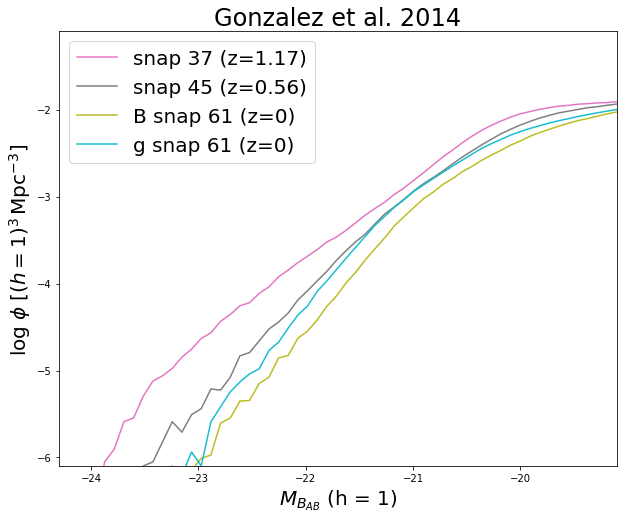

In [578]:
#plot_Schect_mag(p0=16.21*10**(-3),M0=-19.98,alpha=-0.78,h=0.7,label=r'$0.5<z<0.6$')
#plot_Schect_mag(p0=17.70*10**(-3),M0=-20.20,alpha=-0.90,h=0.7,label=r'$0.6<z<0.7$')
#plot_Schect_mag(p0=18.44*10**(-3),M0=-20.19,alpha=-0.81,h=0.7,label=r'$0.7<z<0.8$')
#plot_Schect_mag(p0=11.93*10**(-3),M0=-20.61,alpha=-1.29,h=0.7,label=r'$0.8<z<0.9$')
#plot_Schect_mag(p0=11.27*10**(-3),M0=-20.67,alpha=-1.30,h=0.7,label=r'$0.9<z<1.1$')
#plot_Schect_mag(p0=04.90*10**(-3),M0=-21.02,alpha=-1.30,h=0.7,label=r'$1.1<z<1.3$')
Luminosity_function_GALF(mag_B_37,h=1,label='snap 37 (z=1.17)',fig=0,color='C6')
Luminosity_function_GALF(mag_B_45,h=1,label='snap 45 (z=0.56)',fig=0,color='C7')
Luminosity_function_GALF(mag_B_61,h=1,label='B snap 61 (z=0)',fig=0,color='C8')
Luminosity_function_GALF(mag_g_61,h=1,label='g snap 61 (z=0)',fig=0,color='C9')

#Luminosity_function_GALF(mag_B_47,h=0.7,label='snap 47',fig=0)
plt.legend()
plt.title('Gonzalez et al. 2014')
plt.savefig('../plots/011/luminosity_function_galform_37_45_comparison_redshift_zero.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


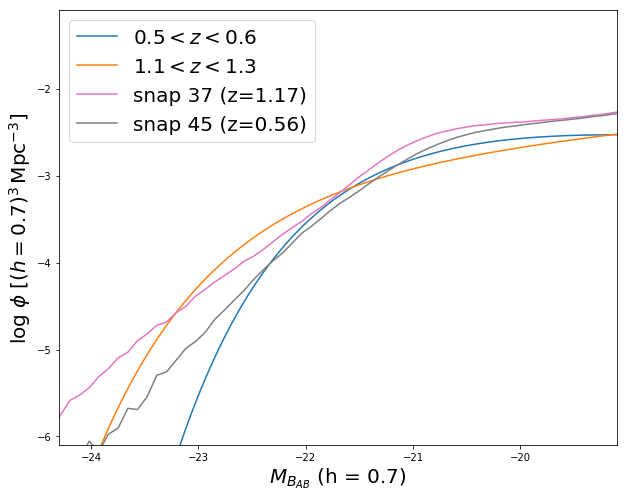

In [574]:
plot_Schect_mag(p0=16.21*10**(-3),M0=-19.98,alpha=-0.78,h=0.7,label=r'$0.5<z<0.6$')
#plot_Schect_mag(p0=17.70*10**(-3),M0=-20.20,alpha=-0.90,h=0.7,label=r'$0.6<z<0.7$')
#plot_Schect_mag(p0=18.44*10**(-3),M0=-20.19,alpha=-0.81,h=0.7,label=r'$0.7<z<0.8$')
#plot_Schect_mag(p0=11.93*10**(-3),M0=-20.61,alpha=-1.29,h=0.7,label=r'$0.8<z<0.9$')
#plot_Schect_mag(p0=11.27*10**(-3),M0=-20.67,alpha=-1.30,h=0.7,label=r'$0.9<z<1.1$')
plot_Schect_mag(p0=04.90*10**(-3),M0=-21.02,alpha=-1.30,h=0.7,label=r'$1.1<z<1.3$')
Luminosity_function_GALF(mag_B_37,h=0.7,label='snap 37 (z=1.17)',fig=0,color='C6')
Luminosity_function_GALF(mag_B_45,h=0.7,label='snap 45 (z=0.56)',fig=0,color='C7')
#Luminosity_function_GALF(mag_B_47,h=0.7,label='snap 47',fig=0)
plt.legend()
plt.savefig('../plots/011/luminosity_function_vipers_and_galform_37_45_only_comparison.png')
plt.show()

In [558]:
# Evolution of luminosity function on my run (see Plot_colour_magnitude.ipynb on 
# dc-manz2@login5.cosma.dur.ac.uk:./galform/python/galform/read/)

# Understanding Moustakas 

The conversion from [OII]$\lambda 3727$ Luminosity to SFR comes from Moustakas et al. 2006. 

Consider Table 2 and do a linear fit of the coefficients in the columns $M_B$ and $P_{50}$ (neglecting the 2 weakest magnitudes).

Marco obtained: $m=-0169$ and $b=-2.893$.

And since the table gives a relation of the ratio between SFR and OII luminosity, you need to multiply (i.e. add in logarithm) the OII luminosity like this:

$\log_{10} \rm{SFR} = -2.893 -0.169 \times M_B + \log_{10} \rm{Lum[OII]}$ 

Since in the VIPERS table we have fluxes of [OII], we need to convert them into luminosity like this:

$\rm{Lum[OII]} = 4\pi\,\, \text{Luminosity-distance}^2 \times \rm{Flux[OII]}$

In [571]:
# Table 2 Moustakas et al. 2006
mb = np.array([-16.43,-17.68,-18.93,-20.18,-21.43]) # M_B
sfr_oii = np.array([0.111,0.282,0.395,0.781,0.972]) # P_50

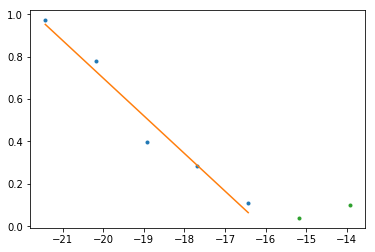

In [576]:
plt.plot(mb,sfr_oii,".") # M_B and P_50 from Table 2 (Moustakas et al. 2006)
plt.plot(mb,m*mb+b) # fit
plt.plot([-13.93,-15.18],[0.098,0.039],".") # points excluded from the fit
plt.show() 

In [561]:
from pylab import *

In [563]:
m,b =polyfit(mb,sfr_oii,1)

In [570]:
mb

[-16.43, -17.68, -18.93, -20.18, -21.43]

In [567]:
b

-2.855282399999992

In [573]:
m

-0.17767999999999967

# Fig 8. (Plot of the tracks in the colour magnitude plane)

In [579]:
# You can find the txt files of the tracks that I use in the paper in  
# /GalaxyEvolution/AnalisiCMR/models/CLOUD_evolution/strisciata/SMART_OK_26_gos_/
# ...now you can find just the relevant files in /DURHAM/PEDER/millennium/data/
#with the same format name like: striscia_1.00_1.30__0.40_0.50_1.txt
#
#
# and the code that I have used is in /GalaxyEvolution/AnalisiCMR/plot_strisciate.py
#

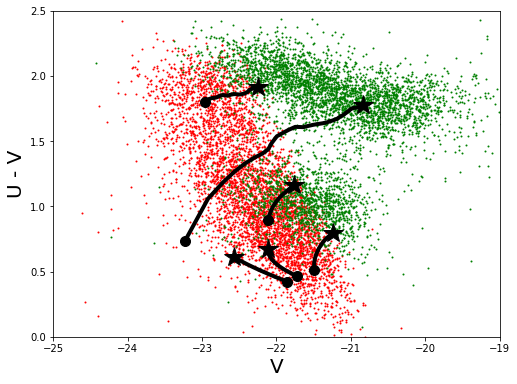

In [634]:
strisciate = [2,3,9,11,14,20]

plt.figure(figsize=(8,6))

plt.plot(V[sel_1013],UV[sel_1013],".",markersize=2,color='red')
plt.plot(NOQUENCH_45['v'],NOQUENCH_45['uv'],'.',markersize=2,color='green')

for s in strisciate:
    x,y=np.loadtxt("../data/striscia_1.00_1.30__0.40_0.50_%i.txt"%s, unpack=True,usecols=[0,1])
    plt.plot(x[0],y[0],".",color='k',markersize=20)
    plt.plot(x[-1],y[-1],"*",color='k',markersize=20)
    plt.plot(x,y,"-",color='k',lw=4)

plt.xlim(-25.,-19.) 
plt.ylim(0.,2.5)

plt.xlabel('V')
plt.ylabel('U - V')

plt.savefig('../plots/011/colour_magnitude_tracks.png')

plt.show()

# New tracks generated with 016 (1.0<z<1.3)

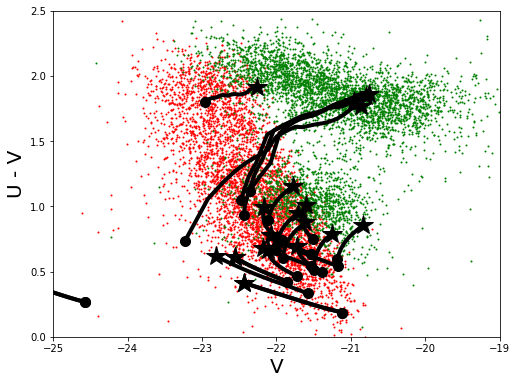

In [144]:
plt.figure(figsize=(8,6))

plt.plot(V[sel_1013],UV[sel_1013],".",markersize=2,color='red')
plt.plot(NOQUENCH_45['v'],NOQUENCH_45['uv'],'.',markersize=2,color='green')

os.system("ls ../VIPERS/TRACKS/*1013* > ../data/tracks_name.txt")

f = open("../data/tracks_name.txt","r")
lines = f.readlines() 
f.close()

for i in range(len(lines)):
    x,y=np.loadtxt(str(lines[i][:-1]), unpack=True,usecols=[0,1])
    plt.plot(x[0],y[0],".",color='k',markersize=20)
    plt.plot(x[-1],y[-1],"*",color='k',markersize=20)
    plt.plot(x,y,"-",color='k',lw=4)

plt.xlim(-25.,-19.) 
plt.ylim(0.,2.5)

plt.xlabel('V')
plt.ylabel('U - V')

#plt.savefig('../plots/011/colour_magnitude_tracks.png')

plt.show()

# New tracks (1.0<z<1.1)

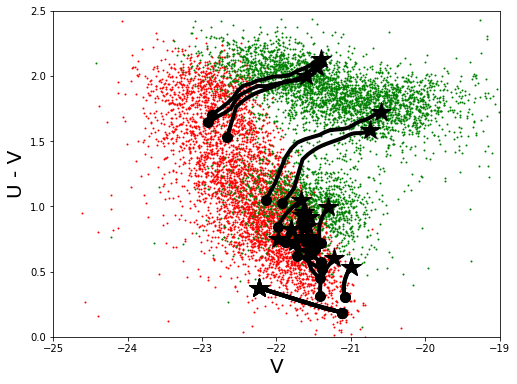

In [146]:
plt.figure(figsize=(8,6))

plt.plot(V[sel_1013],UV[sel_1013],".",markersize=2,color='red')
plt.plot(NOQUENCH_45['v'],NOQUENCH_45['uv'],'.',markersize=2,color='green')

os.system("ls ../VIPERS/TRACKS/*1011_0506* > ../data/tracks_name.txt")

f = open("../data/tracks_name.txt","r")
lines = f.readlines() 
f.close()

for i in range(len(lines)):
    x,y=np.loadtxt(str(lines[i][:-1]), unpack=True,usecols=[0,1])
    plt.plot(x[0],y[0],".",color='k',markersize=20)
    plt.plot(x[-1],y[-1],"*",color='k',markersize=20)
    plt.plot(x,y,"-",color='k',lw=4)

plt.xlim(-25.,-19.) 
plt.ylim(0.,2.5)

plt.xlabel('V')
plt.ylabel('U - V')

#plt.savefig('../plots/011/colour_magnitude_tracks.png')

plt.show()

# Select just the track that I want in the paper with z_start 1.0<z<1.1

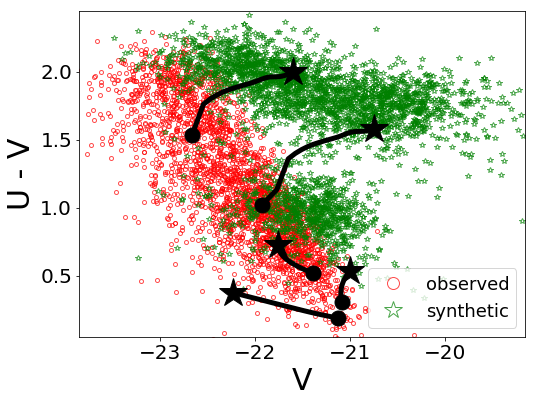

In [30]:
plt.figure(figsize=(8,6))

plt.plot(V[sel_1011],UV[sel_1011],"o",markersize=4,color='red',fillstyle='none',label='observed',alpha=0.7)
v_syn,uv_syn = read_synthetic(zbin_low=0.5,zbin_high=0.6,quench_type=-99)
plt.plot(v_syn,uv_syn,'*',markersize=6,color='green',fillstyle='none',label='synthetic',alpha=0.7)

os.system("ls ../VIPERS/TRACKS/*1011_0506* > ../data/tracks_name.txt")

f = open("../data/tracks_name.txt","r")
lines = f.readlines() 
f.close()

#for i in range(len(lines)):
for i in [7,12,17,18,10]:
#for i in [25]:
    x,y=np.loadtxt(str(lines[i][:-1]), unpack=True,usecols=[0,1])
    plt.plot(x[0],y[0],".",color='k',markersize=30)
    plt.plot(x[-1],y[-1],"*",color='k',markersize=30)
    plt.plot(x,y,"-",color='k',lw=5)#,label=i)

#plt.xlim(-25.,-19.) 
#plt.ylim(0.,2.5)

plt.xlim(-23.85,-19.15) 
plt.ylim(0.05,2.45)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel('V',fontsize=30)
plt.ylabel('U - V',fontsize=30)
plt.legend(markerscale=3,fontsize=18)
#plt.savefig('../plots/011/colour_magnitude_tracks_1011_circlesandstars.png')
plt.savefig('../plots/paper/colour_magnitude_tracks_1011_circlesandstars_fig3.png')

plt.show()

In [149]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

# Fig 9, 10, 11 (NO QUENCH, QUENCH_0, QUENCH_INTERVAL_1_2_3)

In [41]:
def read_synthetic(zbin_low=0.40,zbin_high=0.50,quench_type=-99):
    '''evolution starts always from bin 1.0 < z < 1.3 into the bin specified by the input parameters
    quench type can be [-99,0,1,2,3] that means respectively no quench (Sandage exponentially delayed SFH), 
    quench at the epoch of observation, 
    and quench randomly spread in interval times of 1,2,3 Gyrs after the epoch of observation. 
    The function returns the value of v,u-v points'''
    import pandas as pd
    
    a=str(int(zbin_low*10))
    b=str(int(zbin_high*10))
    z_end_label =a+b
    quench_type_label = ""
    
    if quench_type==-99:
        quench_type_label='NO_QUENCH'
    elif type(quench_type)==int:
        quench_type_label='QUENCH_'+str(quench_type)
    elif type(quench_type)==float:
        quench_type_label='QUENCH_'+string.replace(string.replace('%5.1f' % quench_type, ' ', ''),'.','_')
        
    data = pd.read_csv('../VIPERS/SYNTHETIC/'+quench_type_label+'/SYNTHETIC_points_1011_'+z_end_label+'.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])
    return np.array(data['v']),np.array(data['uv'])

In [42]:
#v,uv =read_synthetic(zbin_low=0.4,zbin_high=0.5,quench_type=1)

In [43]:
# try random sub-sampling
import random as R
sel = ((Z>0.5)&(Z<=0.6))
samp_big = V[sel]
samp_small, _ = read_synthetic(zbin_low=0.5,zbin_high=0.6,quench_type=-99)
rand_samp = R.sample(range(len(samp_big)),len(samp_small))

In [44]:
#check that the subsampling is doing right
print len(samp_big),len(samp_small) 
print np.max(rand_samp)
print len(rand_samp)

13535 2806
13527
2806


In [45]:
#define function for sub-sampling
def sub_samp(vector,N,seed=None):
    '''it returns an sub-array containing N random objects from the vector '''
    import random as R 
    if seed!=None:
        R.seed(a=seed)
    rand_samp = R.sample(range(len(vector)),N)
    return vector[rand_samp]

def sub_samp_list(vector,N,seed=None):
    '''it returns a list of N random indexes from the vector '''
    import random as R 
    if seed!=None:
        R.seed(a=seed)
    rand_samp = R.sample(range(len(vector)),N)
    return rand_samp

In [129]:
def plot_panel(U_obs,V_obs,Z_obs,zbin_low=0.6,zbin_high=0.7,num_panel=1,quench_type=-99,y_visible=True,ymin_syn_edge=0.45,ymin_real_edge=0.45,subsamp=False):
    #computing cosmic times for the time of evolution in the label
    U = U_obs
    V = V_obs
    UV = U_obs-V_obs
    c_syn = "blue"
    c_obs = "red"
    
    from astropy.cosmology import FlatLambdaCDM
    cosmo = FlatLambdaCDM(Om0=0.3,H0=70)
    # z_start: 1.0 < z < 1.3
    sel_start = ((Z_obs>1.0)&(Z_obs<=1.1))
    z_med_start = np.median(Z_obs[sel_start])
    t_med_start = cosmo.age(z=z_med_start).value
    # z_end: current z bin
    sel = ((Z_obs>zbin_low)&(Z_obs<=zbin_high))
    z_med = np.median(Z_obs[sel])
    t_med = cosmo.age(z=z_med).value
    # delta cosmic time of evolution
    delta_t = t_med -t_med_start
    #print delta_t
    
    # Read from txt file the synthetic data (for a specific quenching scenario)
    v,uv =read_synthetic(zbin_low,zbin_high,quench_type=quench_type)
    
    ax = plt.subplot(1,3,num_panel)
    
    if subsamp:
        rand_samp = sub_samp_list(V[sel],len(v),seed=1)
        real_V =  np.array(V[sel])[rand_samp]
        real_UV = np.array(UV[sel])[rand_samp]
    else:
        real_V = V[sel]
        real_UV = UV[sel]
    
    if subsamp:
        np.random.seed()
        #plot point by point, randomly choosing which one on top
        for i in range(len(real_V)):
            top = np.random.choice([0,1])
            #plot REAL data in the right z bin
            ax.plot(real_V[i],real_UV[i],".",markersize=1,color=c_obs,alpha=1,zorder=top)
            #plot SYNTHETIC
            if top==1:
                top=0
            else:
                top=1
            ax.plot(v[i],uv[i],".",markersize=1,color=c_syn,alpha=1,zorder=top)
    else:
        #plot REAL data in the right z bin
        ax.plot(real_V,real_UV,".",markersize=1,color=c_obs,alpha=1)
        #plot SYNTHETIC
        ax.plot(v,uv,".",markersize=1,color=c_syn,alpha=1)
    
    
    
    print"---"
    print len(v),len(V[sel])
    print"---"
    
    #edges
    ex_syn,ey_syn = EDGE(v,uv,x_min=-25,x_max=-18,y_min=ymin_syn_edge,y_max=2.2)
    ex_real,ey_real = EDGE(V[sel],UV[sel],x_min=-25,x_max=-18,y_min=ymin_real_edge,y_max=2.2)
    
    ax.errorbar(ex_syn,ey_syn,xerr=0.15,lw=3,color=c_syn)
    ax.plot(ex_syn,ey_syn,".",markersize=10,color=c_syn)
    ax.errorbar(ex_real,ey_real,xerr=0.15,lw=3,color=c_obs)
    ax.plot(ex_real,ey_real,".",markersize=10,color=c_obs)
    
    #setting properties of the plot
    #ax.set_xlim(-24.35,-18.25)
    #ax.set_ylim(0.25,3.15)
    
    ax.set_xlim(-24.35,-19.05)
    ax.set_ylim(0.25,2.45)
    
    num_str = r"$t_"+str(num_panel)+"$"
    plt.text(-24,2.2,num_str,fontsize=30)
    
    
    ax.set_xlabel('V',fontsize=30)
    if y_visible:
        ax.set_ylabel('U - V',fontsize=30)
    else:
        plt.setp(ax.get_yticklabels(),visible=False)
        
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)    
        
    #setting label with time of evolution and redshift bin
    s = r"$\Delta t = %.1f \; \rm{Gyr}$"%delta_t
    s+= "\n"
    s += r"$%.1f < z < %.1f$"%(zbin_low,zbin_high)  
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(-24.,0.35,s,fontsize=16,bbox=props)
    return ax

## NO QUENCH (Fig 9)

---
2806 10289
---
---
2806 14597
---
---
2806 13535
---


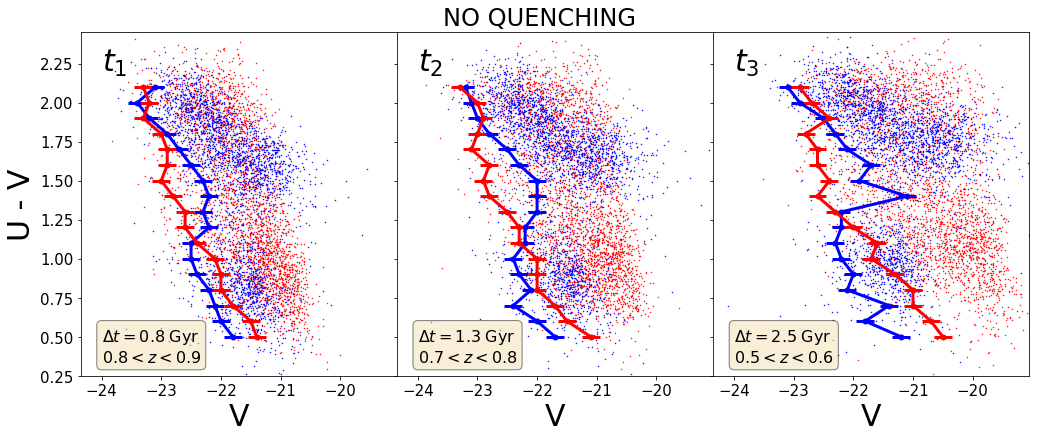

In [130]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=-99,num_panel=1,y_visible=True,subsamp=True)
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=-99,num_panel=2,y_visible=False,subsamp=True)
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=-99,num_panel=3,y_visible=False,subsamp=True)


plt.suptitle("NO QUENCHING")
plt.savefig('../plots/011/Evolution_1011_NO_QUENCH_nowhite_t_sub.png',bbox_inches="tight",pad_inches=0.0)
plt.savefig('../plots/paper/Evolution_1011_NO_QUENCH_nowhite_t_sub_fig6.png',bbox_inches="tight",pad_inches=0.0)

plt.show()

# QUENCH 0 (Fig 10)

---
2806 10289
---
---
2806 14597
---
---
2806 13535
---


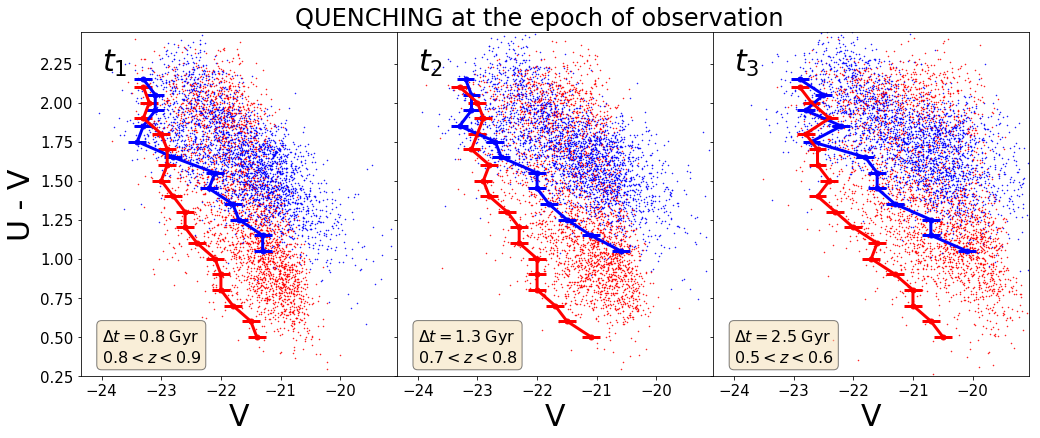

In [131]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=0,num_panel=1,y_visible=True ,ymin_syn_edge=1,subsamp=True)
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=0,num_panel=2,y_visible=False,ymin_syn_edge=1,subsamp=True)
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=0,num_panel=3,y_visible=False,ymin_syn_edge=1,subsamp=True)

plt.suptitle("QUENCHING at the epoch of observation")
plt.savefig('../plots/011/Evolution_1011_QUENCH_0_nowhite_t_sub.png',bbox_inches="tight",pad_inches=0.0)
plt.savefig('../plots/paper/Evolution_1011_QUENCH_0_nowhite_t_sub_fig6.png',bbox_inches="tight",pad_inches=0.0)

plt.show()

# QUENCH 1 (Fig 11a)

---
2806 10289
---
---
2806 14597
---
---
2806 13535
---


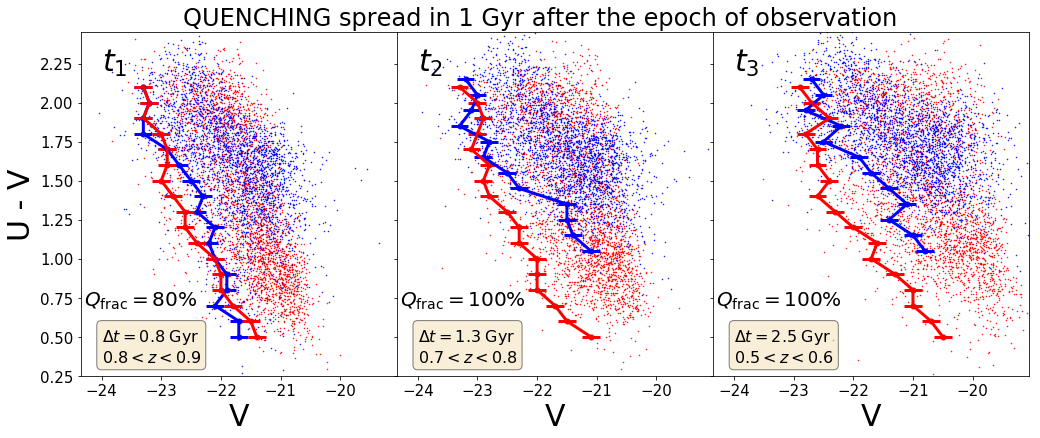

In [132]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=1,num_panel=1,y_visible=True ,ymin_syn_edge=0.45,subsamp=True)
plt.text(-24.3,0.7,r"$Q_{\rm{frac}}= 80\%$")
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=1,num_panel=2,y_visible=False,ymin_syn_edge=1.0,subsamp=True)
plt.text(-24.3,0.7,r"$Q_{\rm{frac}}= 100\%$")
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=1,num_panel=3,y_visible=False,ymin_syn_edge=1.0,subsamp=True)
plt.text(-24.3,0.7,r"$Q_{\rm{frac}}= 100\%$")

plt.suptitle("QUENCHING spread in 1 Gyr after the epoch of observation")
plt.savefig('../plots/011/Evolution_1011_QUENCH_1_nowhite_t_sub.png',bbox_inches="tight",pad_inches=0.0)
plt.savefig('../plots/paper/Evolution_1011_QUENCH_1_nowhite_t_sub_fig8.png',bbox_inches="tight",pad_inches=0.0)

plt.show()

# QUENCH 2 (Fig 11b)

0.825741564616
1.31978536933
2.48025607696


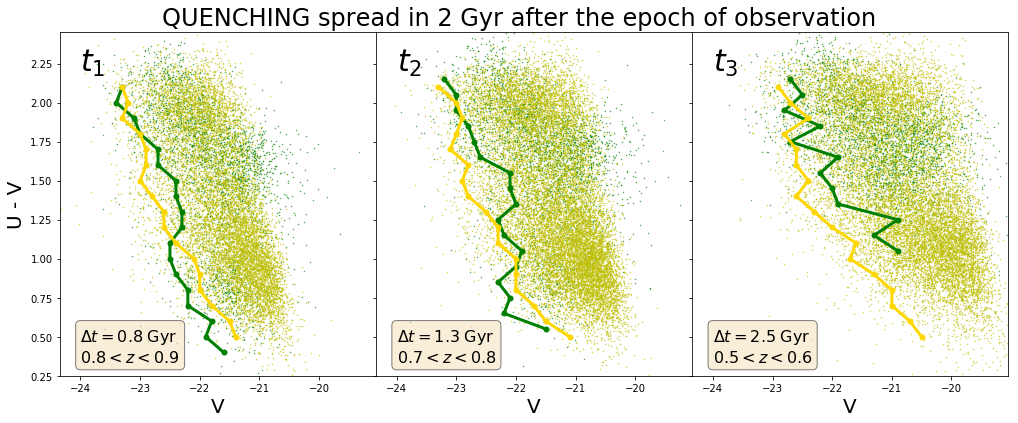

In [33]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=2,num_panel=1,y_visible=True ,ymin_syn_edge=0.35)
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=2,num_panel=2,y_visible=False,ymin_syn_edge=0.5)
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=2,num_panel=3,y_visible=False,ymin_syn_edge=1.0)

plt.suptitle("QUENCHING spread in 2 Gyr after the epoch of observation")
#plt.savefig('../plots/011/Evolution_1011_QUENCH_2_nowhite_t.png',bbox_inches="tight",pad_inches=0.0)
plt.show()

# QUENCH 3 (Fig 11c)

0.825741564616
1.31978536933
2.48025607696


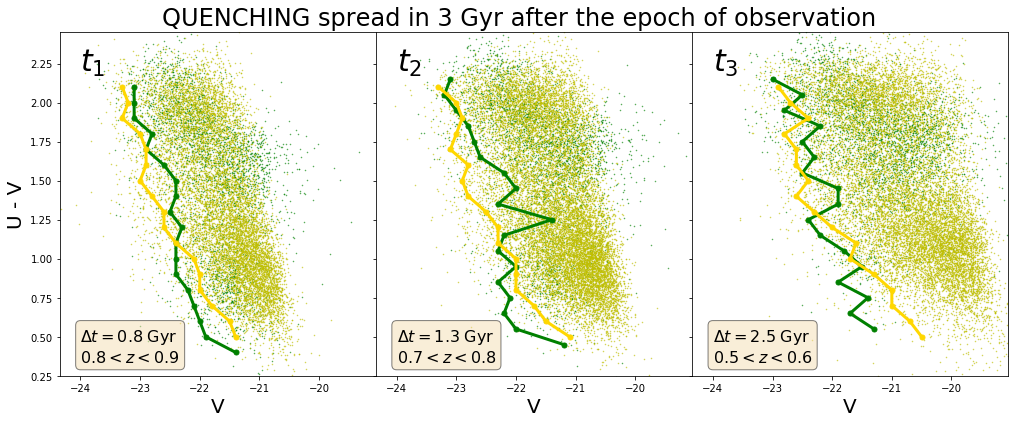

In [32]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=3,num_panel=1,y_visible=True ,ymin_syn_edge=0.35)
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=3,num_panel=2,y_visible=False,ymin_syn_edge=0.4)
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=3,num_panel=3,y_visible=False,ymin_syn_edge=0.5)

plt.suptitle("QUENCHING spread in 3 Gyr after the epoch of observation")
plt.savefig('../plots/011/Evolution_1011_QUENCH_3_nowhite_t.png',bbox_inches="tight",pad_inches=0.0)
plt.show()

# QUENCH 1.5

---
2806 10289
---
---
2806 14597
---
---
2806 13535
---


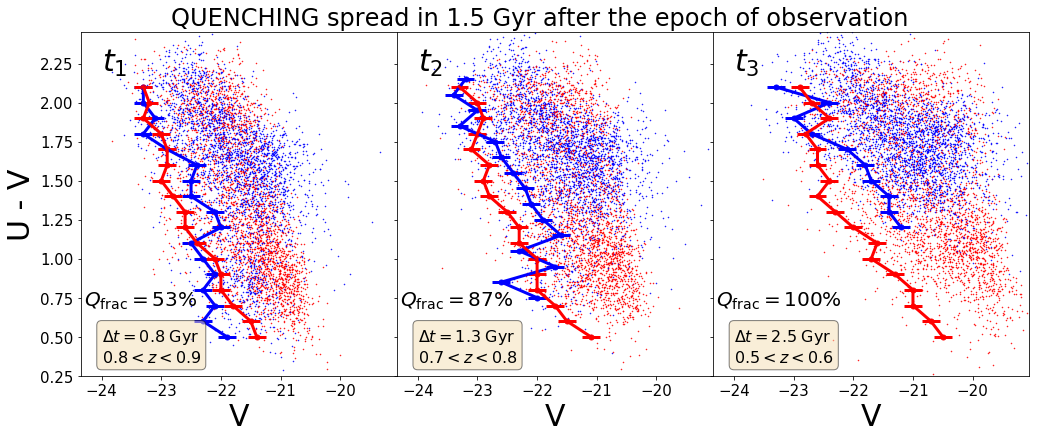

In [133]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=1.5,num_panel=1,y_visible=True ,ymin_syn_edge=0.45,subsamp=True)
plt.text(-24.3,0.7,r"$Q_{\rm{frac}}= 53\%$")
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=1.5,num_panel=2,y_visible=False,ymin_syn_edge=0.7,subsamp=True)
plt.text(-24.3,0.7,r"$Q_{\rm{frac}}= 87\%$")
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=1.5,num_panel=3,y_visible=False,ymin_syn_edge=1.15,subsamp=True)
plt.text(-24.3,0.7,r"$Q_{\rm{frac}}= 100\%$")

plt.suptitle("QUENCHING spread in 1.5 Gyr after the epoch of observation")
plt.savefig('../plots/011/Evolution_1011_QUENCH_1_5_nowhite_t_sub.png',bbox_inches="tight",pad_inches=0.0)
plt.savefig('../plots/paper/Evolution_1011_QUENCH_1_5_nowhite_t_sub_fig8.png',bbox_inches="tight",pad_inches=0.0)

plt.show()

# QUENCH 2.5

---
2806 10289
---
---
2806 14597
---
---
2806 13535
---


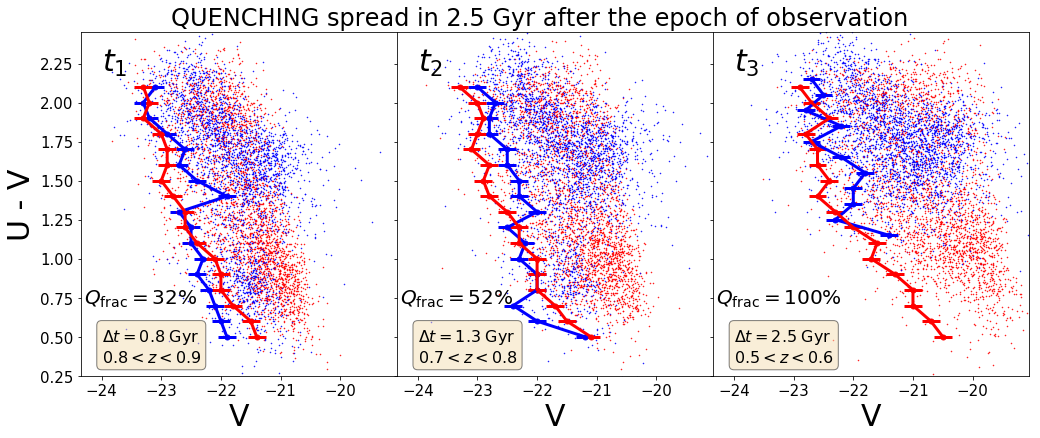

In [134]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=2.5,num_panel=1,y_visible=True ,ymin_syn_edge=0.45,subsamp=True)
plt.text(-24.3,0.71,r"$Q_{\rm{frac}}= 32\%$")
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=2.5,num_panel=2,y_visible=False,ymin_syn_edge=0.45,subsamp=True)
plt.text(-24.3,0.71,r"$Q_{\rm{frac}}= 52\%$")
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=2.5,num_panel=3,y_visible=False,ymin_syn_edge=1.1,subsamp=True)
plt.text(-24.3,0.71,r"$Q_{\rm{frac}}= 100\%$")


plt.suptitle("QUENCHING spread in 2.5 Gyr after the epoch of observation")
plt.savefig('../plots/011/Evolution_1011_QUENCH_2_5_nowhite_t_sub.png',bbox_inches="tight",pad_inches=0.0)
plt.savefig('../plots/paper/Evolution_1011_QUENCH_2_5_nowhite_t_sub_fig8.png',bbox_inches="tight",pad_inches=0.0)

plt.show()

# QUENCH 2.4

0.825741564616
1.31978536933
2.48025607696


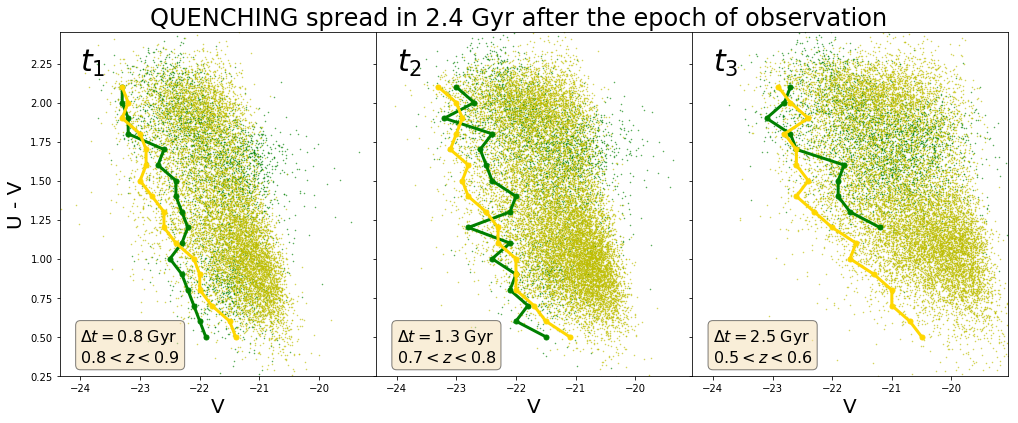

In [35]:
fig = plt.figure(1,figsize=(17,6))
fig.subplots_adjust(top=0.92,wspace=0,hspace=0)

plot_panel(U,V,Z,zbin_low=0.8,zbin_high=0.9,quench_type=2.4,num_panel=1,y_visible=True ,ymin_syn_edge=0.45)
plot_panel(U,V,Z,zbin_low=0.7,zbin_high=0.8,quench_type=2.4,num_panel=2,y_visible=False,ymin_syn_edge=0.45)
plot_panel(U,V,Z,zbin_low=0.5,zbin_high=0.6,quench_type=2.4,num_panel=3,y_visible=False,ymin_syn_edge=1.15)

plt.suptitle("QUENCHING spread in 2.4 Gyr after the epoch of observation")
plt.savefig('../plots/011/Evolution_1011_QUENCH_2_4_nowhite_t.png',bbox_inches="tight",pad_inches=0.0)
plt.show()

In [889]:
cosmo.age(z=1.05).value-cosmo.age(z=0.85).value

-0.8399339918663564

In [885]:
cosmo.age(z=0.9)

<Quantity 6.17079932 Gyr>

In [890]:
np.median(Z[sel_1011])

1.044

In [893]:
cosmo.age(z=np.median(Z[sel_1011])).value-cosmo.age(z=np.median(Z[sel_0809])).value

-0.8257415646156216

In [65]:
006.25+\
004.99+\
052.25+\
009.26+\
208.27+\
003.89+\
001.95+\
013.33+\
009.03+\
007.32+\
008.00

324.5399999999999

In [1]:
import numpy

In [45]:
numpy.random.seed(0)
print numpy.random.choice([0,1,2,3,4,5,6,7])
print numpy.random.choice([0,1,2,3,4,5,6,7])
print numpy.random.choice([0,1,2,3,4,5,6,7])

4
7
5


In [90]:
ABSOLUTE_MAGNITUDE_minus5logh(m=22.5,z=0.55)+np.log10(0.7)

-19.392000855970295

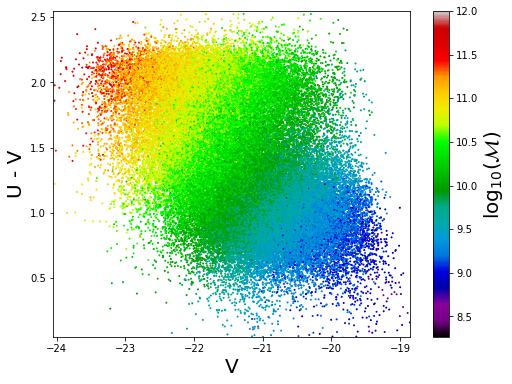

In [10]:
plt.figure(figsize=(8,6))
sel=np.where((Z>=0.5)&(Z<1.1))#&(log_mass>10.0)&(log_mass<11.0))
plt.scatter(V[sel],UV[sel],c=log_mass[sel],s=1,cmap='nipy_spectral')
plt.xlabel('V')
plt.ylabel('U - V')
plt.xlim(-24.05,-18.85)
plt.ylim(0.05,2.55)
plt.colorbar(label=r'$\log_{10}(\mathcal{M})$ ')
#plt.savefig('../plots/011/colmag_mass.png',bbox_inches="tight",pad_inches=0.0)
plt.show()

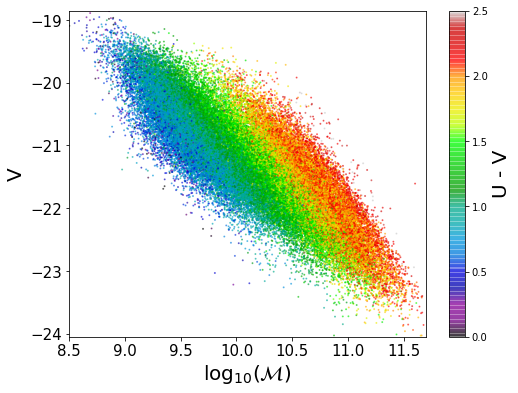

In [88]:
plt.figure(figsize=(8,6))
sel=np.where((Z>=0.5)&(Z<1.1))#&(log_mass>10.0)&(log_mass<11.0))
plt.scatter(log_mass[sel],V[sel],c=UV[sel],vmin=0,vmax=2.5,s=1,cmap='nipy_spectral',alpha=0.5)

plt.xlabel(r'$\log_{10}(\mathcal{M})$ ')
plt.ylabel('V',fontsize=20)
plt.ylim(-24.05,-18.85)
plt.xlim(8.5,11.7)
plt.colorbar(label='U - V')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../plots/011/mass_magnitude_colour.png',bbox_inches="tight",pad_inches=0.0)
plt.show()

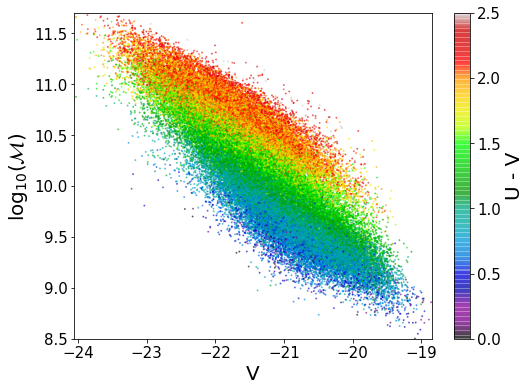

In [96]:
plt.figure(figsize=(8,6))
sel=np.where((Z>=0.5)&(Z<1.1))#&(log_mass>10.0)&(log_mass<11.0))
plt.scatter(V[sel],log_mass[sel],c=UV[sel],vmin=0,vmax=2.5,s=1,cmap='nipy_spectral',alpha=0.5)

plt.ylabel(r'$\log_{10}(\mathcal{M})$ ',fontsize=20)
plt.xlabel('V',fontsize=20)
plt.xlim(-24.05,-18.85)
plt.ylim(8.5,11.7)
cbar = plt.colorbar(label='U - V')
cbar.ax.tick_params(labelsize=15)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../plots/011/mass_magnitude_colour_rev.png',bbox_inches="tight",pad_inches=0.1)
plt.savefig('../plots/paper/mass_magnitude_colour_rev_figD14.png',bbox_inches="tight",pad_inches=0.1)

plt.show()

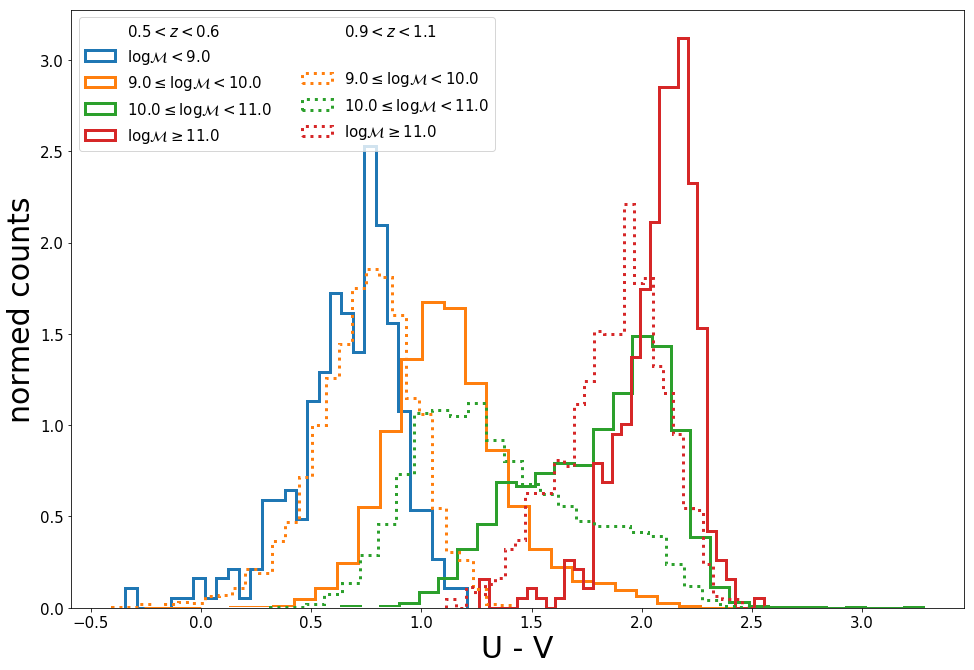

In [103]:
fig,ax = plt.subplots(figsize=(16,11))

sel_z_low = np.where((Z>=0.5)&(Z<0.6))

# selection stellar masses
sel_m1 = np.where(log_mass<9.0)
sel_m2 = np.where((log_mass>=9.0)&(log_mass<10.0))
sel_m3 = np.where((log_mass>=10.0)&(log_mass<11.0))
sel_m4 = np.where(log_mass>=11.)

# intersect z and mass selection (low redshift)
sel_1 = np.intersect1d(sel_z_low,sel_m1)
sel_2 = np.intersect1d(sel_z_low,sel_m2)
sel_3 = np.intersect1d(sel_z_low,sel_m3)
sel_4 = np.intersect1d(sel_z_low,sel_m4)

ax.hist(np.array([]),color='w',lw=3,ls='-',histtype='step',label='$0.5<z<0.6$')

ax.hist(UV[sel_1],bins=30,histtype='step',lw=3,normed=True,label=r'$\log \mathcal{M}< 9.0$',color='C0')
ax.hist(UV[sel_2],bins=30,histtype='step',lw=3,normed=True,label='$9.0  \leq \log \mathcal{M} < 10.0$',color='C1')
ax.hist(UV[sel_3],bins=30,histtype='step',lw=3,normed=True,label='$10.0 \leq \log \mathcal{M} < 11.0$',color='C2')
ax.hist(UV[sel_4],bins=30,histtype='step',lw=3,normed=True,label='$\log \mathcal{M} \geq 11.0$',color='C3')

sel_z_high = np.where((Z>=0.9)&(Z<1.1))

# intersect z and mass selection (high redshift)
sel_1 = np.intersect1d(sel_z_high,sel_m1)
sel_2 = np.intersect1d(sel_z_high,sel_m2)
sel_3 = np.intersect1d(sel_z_high,sel_m3)
sel_4 = np.intersect1d(sel_z_high,sel_m4)

#ax.scatter(None,None,marker='',label='$0.9<z<1.1$')
ax.hist(np.array([]),color='w',lw=3,ls='-',histtype='step',label='$0.9<z<1.1$')
ax.hist(np.array([]),color='w',lw=3,ls='-',histtype='step',label=' ')


#plt.hist(UV[sel_1],bins=30,histtype='step',ls='--',lw=3,normed=True,label=r'$\log \mathcal{M}< 9.0$')
ax.hist(UV[sel_2],bins=30,histtype='step',ls='dotted',lw=3,normed=True,label='$9.0  \leq \log \mathcal{M} < 10.0$',color='C1')
ax.hist(UV[sel_3],bins=30,histtype='step',ls='dotted',lw=3,normed=True,label='$10.0 \leq \log \mathcal{M} < 11.0$',color='C2')
ax.hist(UV[sel_4],bins=30,histtype='step',ls='dotted',lw=3,normed=True,label='$\log \mathcal{M} \geq 11.0$',color='C3')


ax.set_xlabel('U - V',fontsize=30)
ax.set_ylabel('normed counts',fontsize=30)
ax.legend(loc=2,fontsize=15,ncol=2,frameon=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../plots/011/colour_mass_histograms_zbins.png')
plt.savefig('../plots/paper/colour_mass_histograms_zbins_figD15.png')

plt.show()

In [49]:
#refund Varenna!
print round(3.45*0.9,2)+round(10*0.9,2)+round(6.70*0.9,2)+round(35.50*0.9,2)+round(8.*0.9,2)+round(25.25*0.9,2)+round(7.70*0.9,2)+round(2.80*0.9,2)+round(4.90*0.9,2)+round(13.50*0.9,2)+7.20, 'Pounds'

 113.23 Pounds


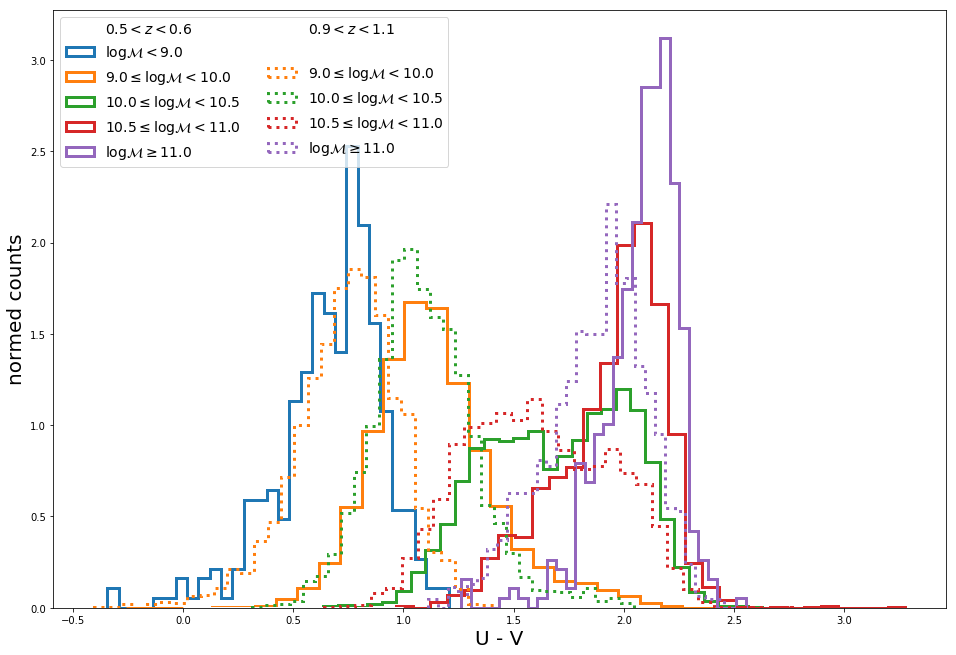

In [151]:
fig,ax = plt.subplots(figsize=(16,11))

sel_z_low = np.where((Z>=0.5)&(Z<0.6))

# selection stellar masses
sel_m1 = np.where(log_mass<9.0)
sel_m2 = np.where((log_mass>=9.0)&(log_mass<10.0))
sel_m3 = np.where((log_mass>=10.0)&(log_mass<10.5))
sel_m4 = np.where((log_mass>=10.5)&(log_mass<11.0))
sel_m5 = np.where(log_mass>=11.)

# intersect z and mass selection (low redshift)
sel_1 = np.intersect1d(sel_z_low,sel_m1)
sel_2 = np.intersect1d(sel_z_low,sel_m2)
sel_3 = np.intersect1d(sel_z_low,sel_m3)
sel_4 = np.intersect1d(sel_z_low,sel_m4)
sel_5 = np.intersect1d(sel_z_low,sel_m5)

ax.hist(np.array([]),color='w',lw=3,ls='-',histtype='step',label='$0.5<z<0.6$')

ax.hist(UV[sel_1],bins=30,histtype='step',lw=3,normed=True,label=r'$\log \mathcal{M}< 9.0$',color='C0')
ax.hist(UV[sel_2],bins=30,histtype='step',lw=3,normed=True,label='$9.0  \leq \log \mathcal{M} < 10.0$',color='C1')
ax.hist(UV[sel_3],bins=30,histtype='step',lw=3,normed=True,label='$10.0 \leq \log \mathcal{M} < 10.5$',color='C2')
ax.hist(UV[sel_4],bins=30,histtype='step',lw=3,normed=True,label='$10.5 \leq \log \mathcal{M} < 11.0$',color='C3')
ax.hist(UV[sel_5],bins=30,histtype='step',lw=3,normed=True,label='$\log \mathcal{M} \geq 11.0$',color='C4')

sel_z_high = np.where((Z>=0.9)&(Z<1.1))

# intersect z and mass selection (high redshift)
sel_1 = np.intersect1d(sel_z_high,sel_m1)
sel_2 = np.intersect1d(sel_z_high,sel_m2)
sel_3 = np.intersect1d(sel_z_high,sel_m3)
sel_4 = np.intersect1d(sel_z_high,sel_m4)
sel_5 = np.intersect1d(sel_z_high,sel_m5)

#ax.scatter(None,None,marker='',label='$0.9<z<1.1$')
ax.hist(np.array([]),color='w',lw=3,ls='-',histtype='step',label='$0.9<z<1.1$')
ax.hist(np.array([]),color='w',lw=3,ls='-',histtype='step',label=' ')


#plt.hist(UV[sel_1],bins=30,histtype='step',ls='--',lw=3,normed=True,label=r'$\log \mathcal{M}< 9.0$')
ax.hist(UV[sel_2],bins=30,histtype='step',ls='dotted',lw=3,normed=True,label='$9.0  \leq \log \mathcal{M} < 10.0$',color='C1')
ax.hist(UV[sel_3],bins=30,histtype='step',ls='dotted',lw=3,normed=True,label='$10.0 \leq \log \mathcal{M} < 10.5$',color='C2')
ax.hist(UV[sel_4],bins=30,histtype='step',ls='dotted',lw=3,normed=True,label='$10.5 \leq \log \mathcal{M} < 11.0$',color='C3')
ax.hist(UV[sel_5],bins=30,histtype='step',ls='dotted',lw=3,normed=True,label='$\log \mathcal{M} \geq 11.0$',color='C4')


ax.set_xlabel('U - V')
ax.set_ylabel('normed counts')
ax.legend(loc=2,fontsize=14,ncol=2,frameon=True)
plt.savefig('../plots/011/colour_mass_histograms_zbins_5.png')
plt.show()


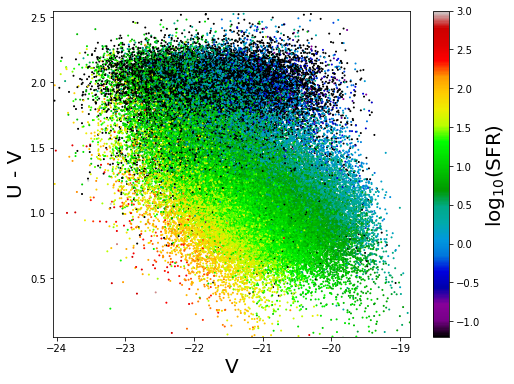

In [101]:
plt.figure(figsize=(8,6))
sel=np.where((Z>=0.5)&(Z<1.1))
plt.scatter(V[sel],UV[sel],c=SFR_OII_log[sel],s=1,cmap='nipy_spectral',vmin=-1.2,vmax=3,alpha=1.)
plt.xlabel('V')
plt.ylabel('U - V')
plt.xlim(-24.05,-18.85)
plt.ylim(0.05,2.55)
plt.colorbar(label=r'$\log_{10}(\rm{SFR})$ ')
plt.savefig('../plots/011/colmag_sfr.png',bbox_inches="tight",pad_inches=0.0)
plt.show()

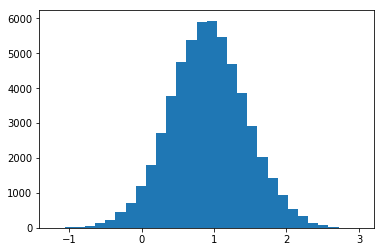

In [93]:
plt.hist(SFR_OII_log,bins=30,range=(-1.2,3))
plt.show()

In [102]:
2+2

4

In [106]:
raw_input()

yes


'yes'

In [110]:
len(np.where(Z>1.1)[0])

1704

In [111]:
5987./1704.

3.5134976525821595

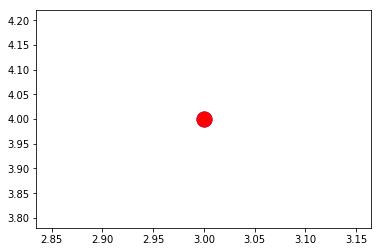

In [46]:
plt.plot(3.,4.,".",markersize=30,color='red',zorder=1)
plt.plot(3.,4.,".",markersize=30,color='blue',zorder=0)

In [107]:
#just checking that the random works fairly
count_0=0
count_1=1
for i in range(1000):
    r = np.random.choice([0,1])
    if r==0:
        count_0 +=1
    else:
        count_1 +=1
print "0: ",count_0
print "1: ",count_1

0:  507
1:  494


In [11]:
from astropy.cosmology import FlatLambdaCDM
import numpy as np

In [19]:
cosmo100 = FlatLambdaCDM(H0=100,Om0=0.3)

In [20]:
(cosmo100.comoving_volume(z=1.3).value-cosmo100.comoving_volume(z=1.0).value)*(24./360.)

2559655795.0284977

In [21]:
cosmo100.comoving_volume(z=1.1)

<Quantity 6.37470326e+10 Mpc3>

In [22]:
((4./3.)*np.pi*cosmo100.comoving_distance(z=1.3)**3-(4./3.)*np.pi*cosmo100.comoving_distance(z=1.0)**3)*(23.5/360)

<Quantity 2.50632963e+09 Mpc3>